

```IMPORTANDO DATOS```

# IMPORTANDO DATOS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import ceil
from datetime import datetime, timedelta

## CARGANDO .CSV

In [3]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

In [7]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


# BUSINESS ANALYTICS



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

## ANÁLISIS DE NULOS

In [9]:
df.isna().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Conclusiones:

  - Años en puesto y Conciliación: Muchos empleados sin esta variable --> Eliminar esta variable

  sexo                         199
  educacion                    101
  satisfaccion_trabajo          76
  implicacion                   18 --> Imputaremos tras EDA

In [10]:
print(df.columns)

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')


In [11]:
df.drop(columns=['anos_en_puesto', 'conciliacion'], inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

## EDA VARIABLES CATEGÓRICAS

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def eda_categoricas(df):
    """
    Realiza un análisis exploratorio de datos (EDA) para variables categóricas en un DataFrame.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    """
    # Identificar variables categóricas
    cat_columns = df.select_dtypes(include=['object', 'category']).columns

    for col in cat_columns:
        print(f"\nAnálisis de la variable: {col}")

        # Mostrar frecuencias de las categorías
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100

        # Mostrar los conteos y porcentajes en la consola
        print(counts)
        print(percentages)

        # Graficar la distribución de las categorías
        plt.figure(figsize=(10, 5))
        ax = sns.countplot(data=df, x=col, order=counts.index)
        plt.title(f'Distribución de la variable {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)

        # Añadir los conteos y porcentajes encima de las barras
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}\n({height / len(df) * 100:.1f}%)',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom')

        plt.show()

# Uso de la función
# df es el DataFrame que contiene tus datos
# eda_categoricas(df)



Análisis de la variable: abandono
abandono
No     1233
Yes     237
Name: count, dtype: int64
abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


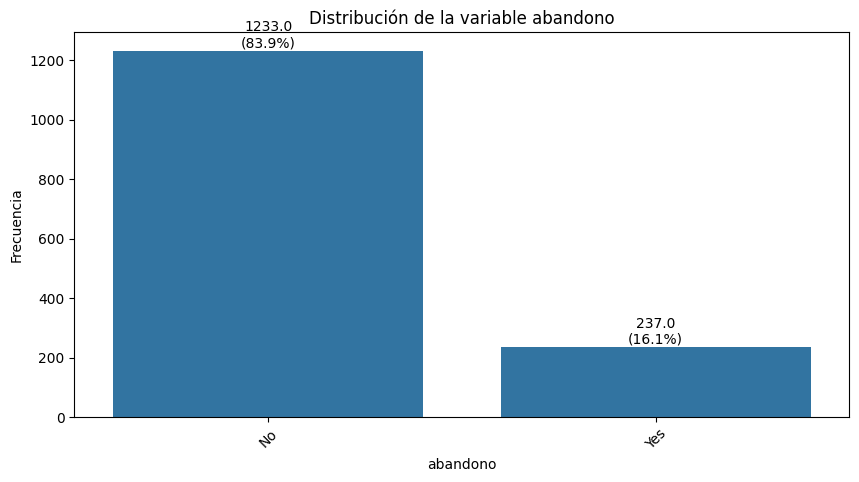


Análisis de la variable: viajes
viajes
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
viajes
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: proportion, dtype: float64


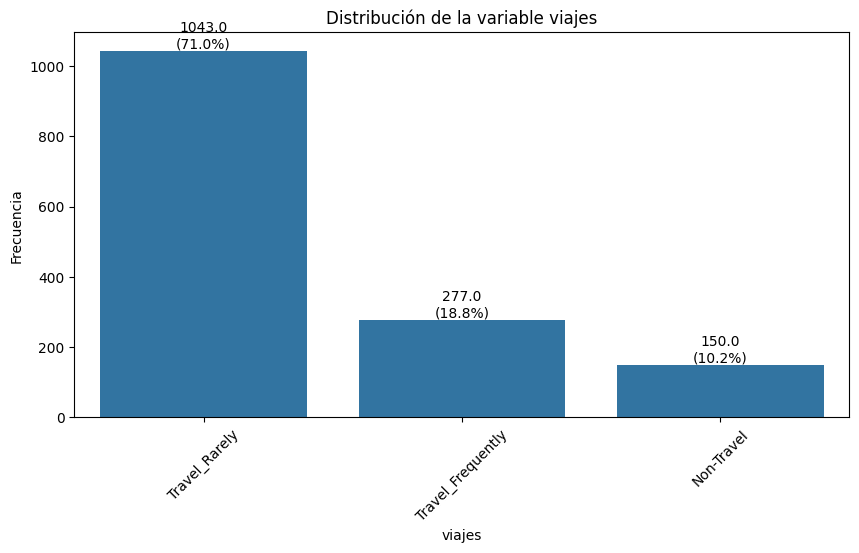


Análisis de la variable: departamento
departamento
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
departamento
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: proportion, dtype: float64


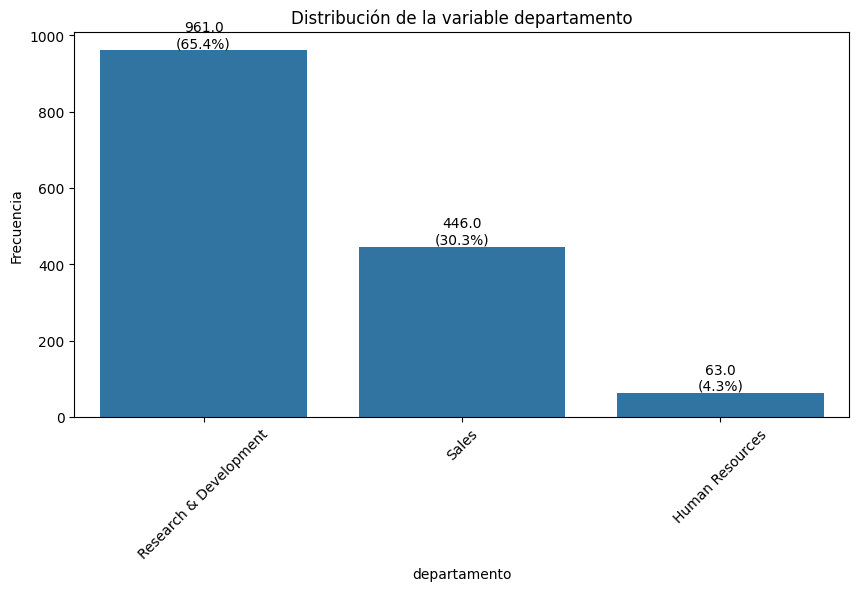


Análisis de la variable: educacion
educacion
Universitaria    814
Secundaria       348
Master           130
Primaria          77
Name: count, dtype: int64
educacion
Universitaria    59.459459
Secundaria       25.420015
Master            9.495982
Primaria          5.624543
Name: proportion, dtype: float64


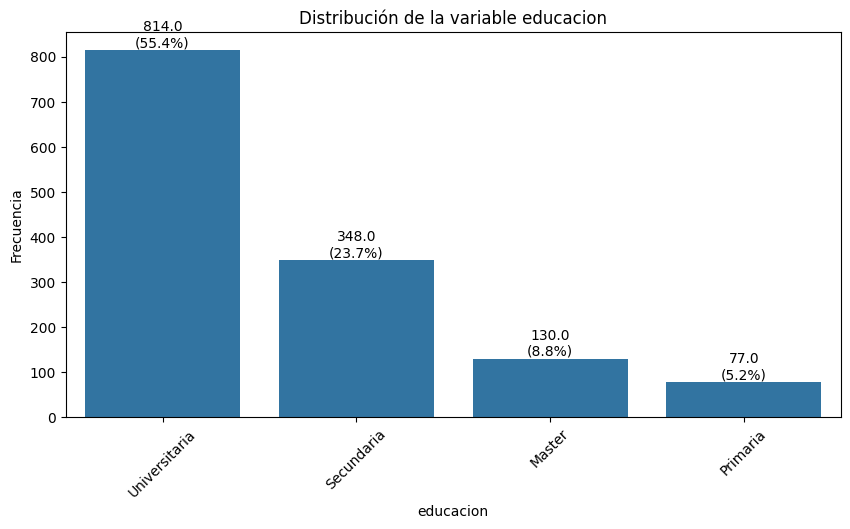


Análisis de la variable: carrera
carrera
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
carrera
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: proportion, dtype: float64


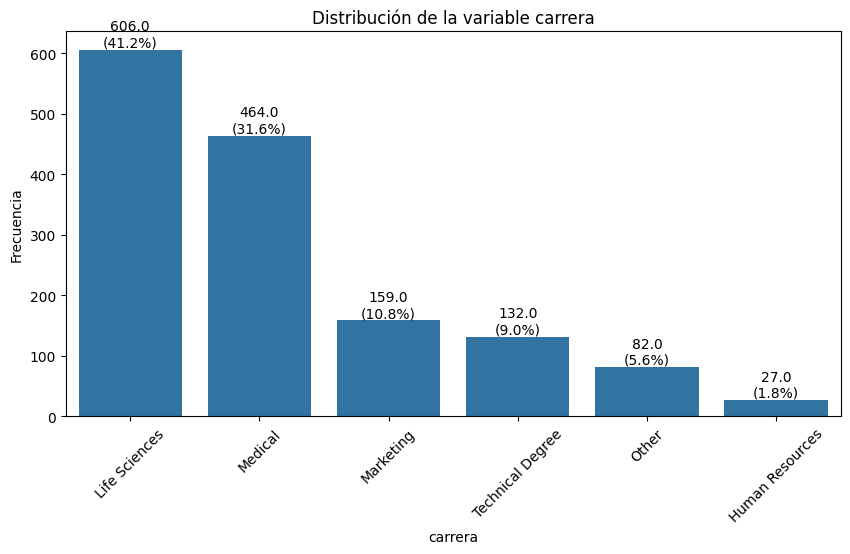


Análisis de la variable: satisfaccion_entorno
satisfaccion_entorno
Alta        453
Muy_Alta    446
Media       287
Baja        284
Name: count, dtype: int64
satisfaccion_entorno
Alta        30.816327
Muy_Alta    30.340136
Media       19.523810
Baja        19.319728
Name: proportion, dtype: float64


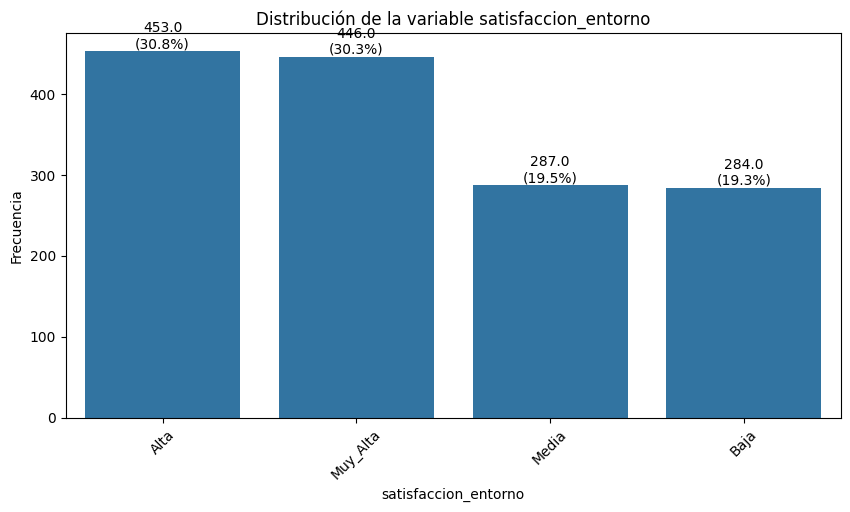


Análisis de la variable: implicacion
implicacion
Alta        857
Media       368
Muy_Alta    144
Baja         83
Name: count, dtype: int64
implicacion
Alta        59.022039
Media       25.344353
Muy_Alta     9.917355
Baja         5.716253
Name: proportion, dtype: float64


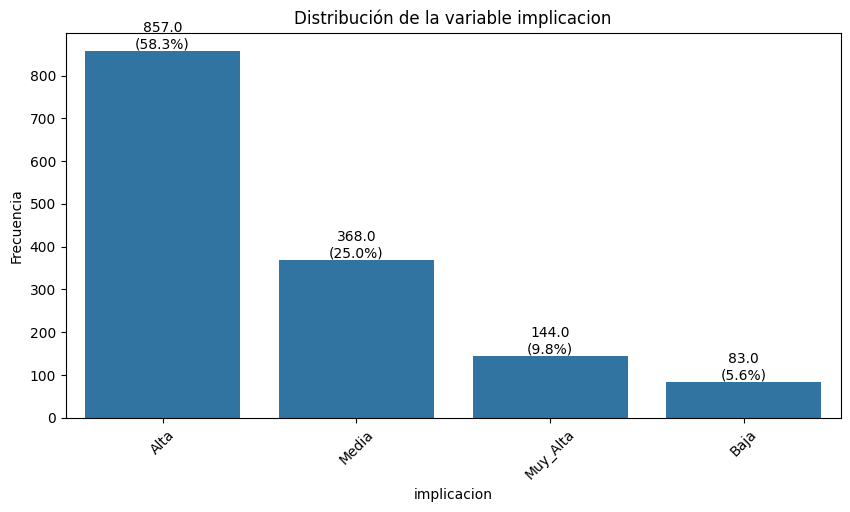


Análisis de la variable: puesto
puesto
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
puesto
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: proportion, dtype: float64


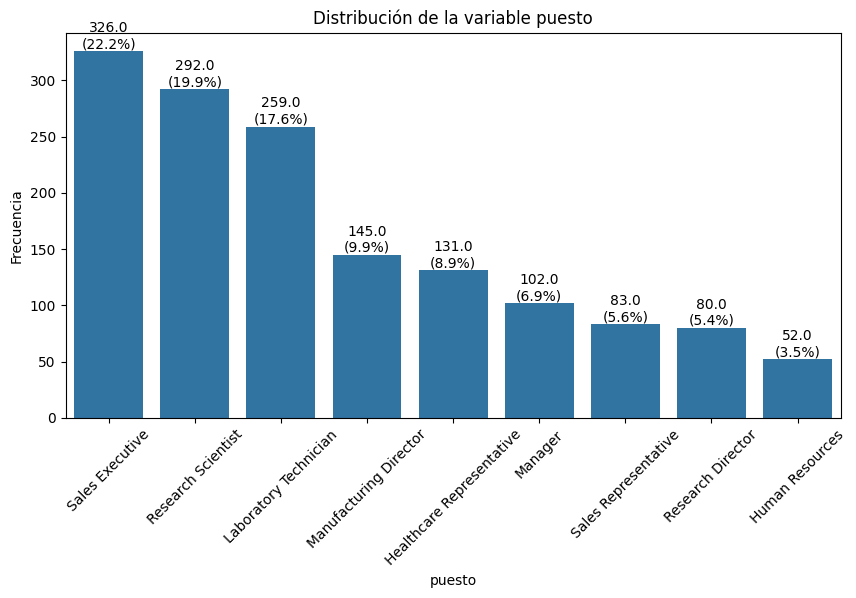


Análisis de la variable: satisfaccion_trabajo
satisfaccion_trabajo
Alta        828
Media       354
Muy_Alta    136
Baja         76
Name: count, dtype: int64
satisfaccion_trabajo
Alta        59.397418
Media       25.394548
Muy_Alta     9.756098
Baja         5.451937
Name: proportion, dtype: float64


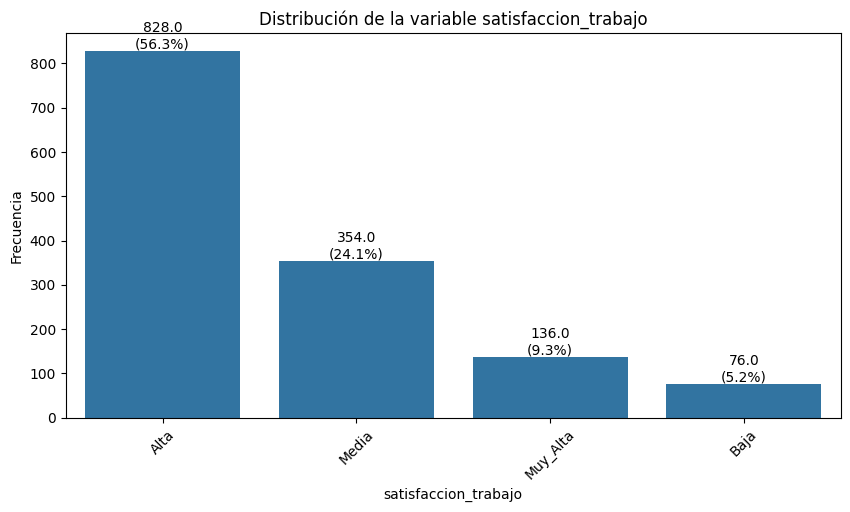


Análisis de la variable: estado_civil
estado_civil
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
estado_civil
Married     45.782313
Single      31.972789
Divorced    22.244898
Name: proportion, dtype: float64


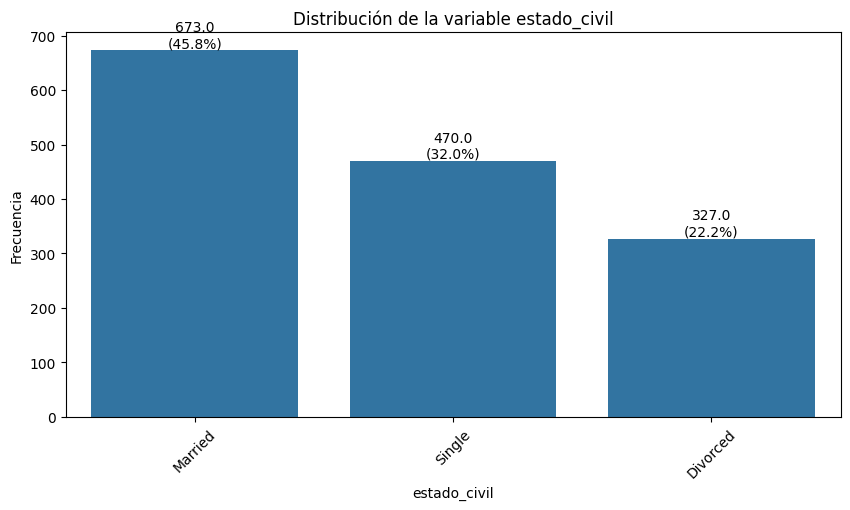


Análisis de la variable: mayor_edad
mayor_edad
Y    1470
Name: count, dtype: int64
mayor_edad
Y    100.0
Name: proportion, dtype: float64


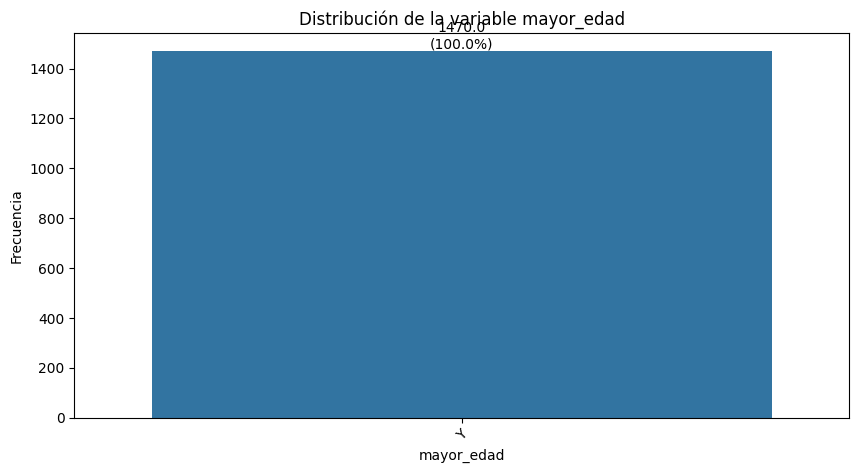


Análisis de la variable: horas_extra
horas_extra
No     1054
Yes     416
Name: count, dtype: int64
horas_extra
No     71.70068
Yes    28.29932
Name: proportion, dtype: float64


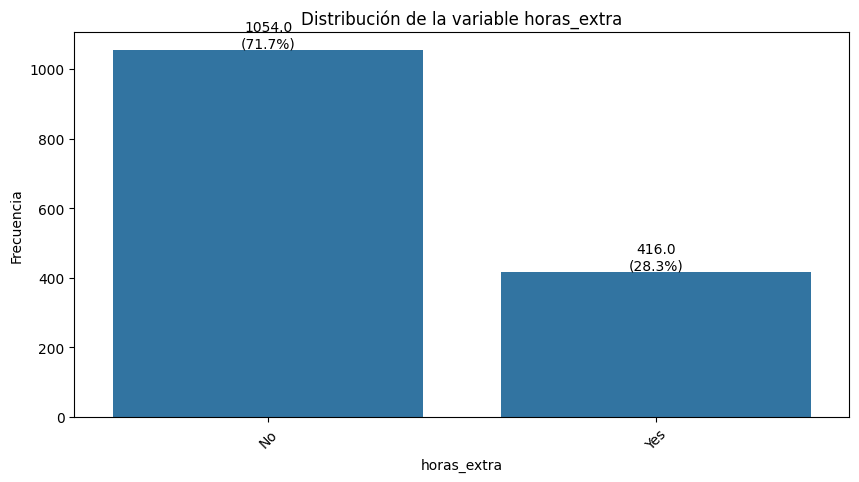


Análisis de la variable: evaluacion
evaluacion
Alta        1244
Muy_Alta     226
Name: count, dtype: int64
evaluacion
Alta        84.62585
Muy_Alta    15.37415
Name: proportion, dtype: float64


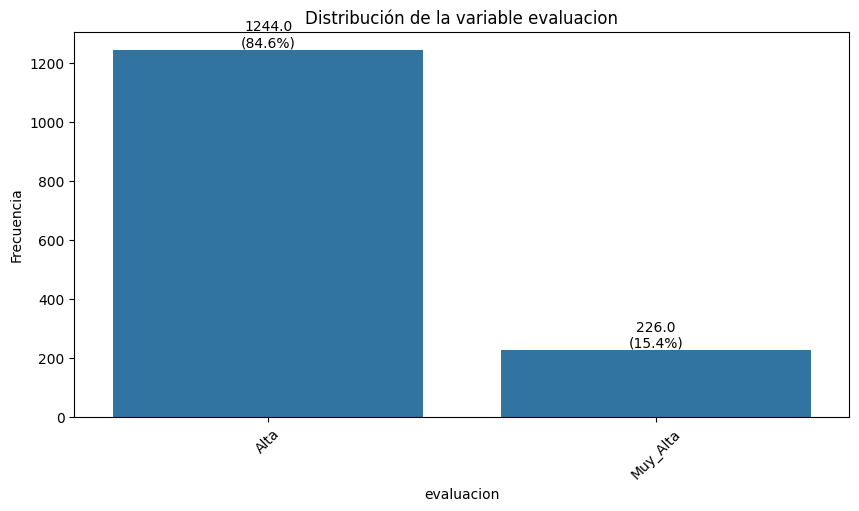


Análisis de la variable: satisfaccion_companeros
satisfaccion_companeros
Alta        459
Muy_Alta    432
Media       303
Baja        276
Name: count, dtype: int64
satisfaccion_companeros
Alta        31.224490
Muy_Alta    29.387755
Media       20.612245
Baja        18.775510
Name: proportion, dtype: float64


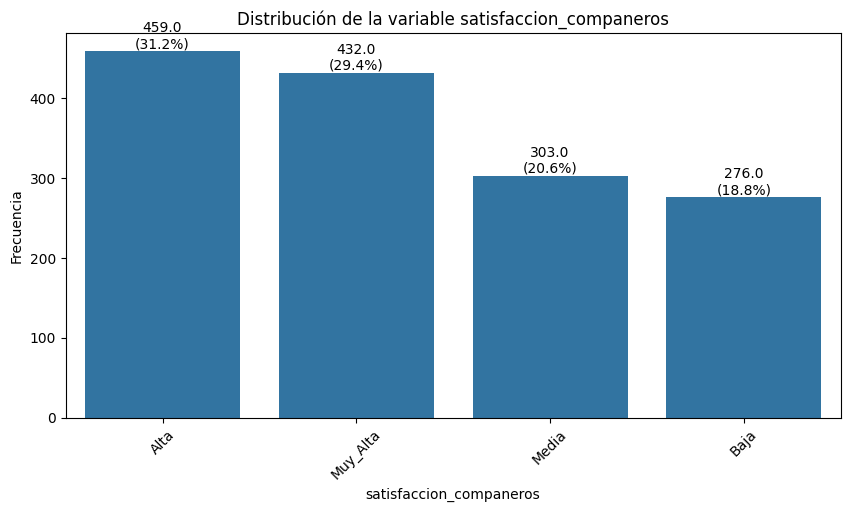

In [18]:
eda_categoricas(df.select_dtypes('O'))

In [19]:
def graficos_eda_categoricos(cat):
    """
    Realiza un análisis exploratorio de datos (EDA) para variables categóricas en un DataFrame.

    Parámetros:
    cat (pd.DataFrame): DataFrame de pandas que contiene las variables categóricas a analizar.
    """
    # Calculamos el número de filas que necesitamos
    filas = ceil(cat.shape[1] / 2)

    # Definimos el gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))

    # Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    # Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        counts = cat[variable].value_counts()
        percentages = cat[variable].value_counts(normalize=True) * 100

        sns.barplot(x=counts.values, y=counts.index, ax=ax[cada], palette="viridis")

        for i in ax[cada].patches:
            ax[cada].text(i.get_width() + 0.1, i.get_y() + i.get_height() / 2,
                          f'{int(i.get_width())}\n({i.get_width() / len(cat) * 100:.1f}%)',
                          ha='center', va='center', fontsize=12, color='black', weight='bold')

        ax[cada].set_title(variable, fontsize=12, fontweight="bold")
        ax[cada].tick_params(labelsize = 12)

    # Ajustamos el layout
    plt.tight_layout()
    plt.show()

<ipython-input-19-fc92ce80a9d3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax[cada], palette="viridis")
<ipython-input-19-fc92ce80a9d3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax[cada], palette="viridis")
<ipython-input-19-fc92ce80a9d3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax[cada], palette="viridis")
<ipython-input-19-fc92ce80a9d3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

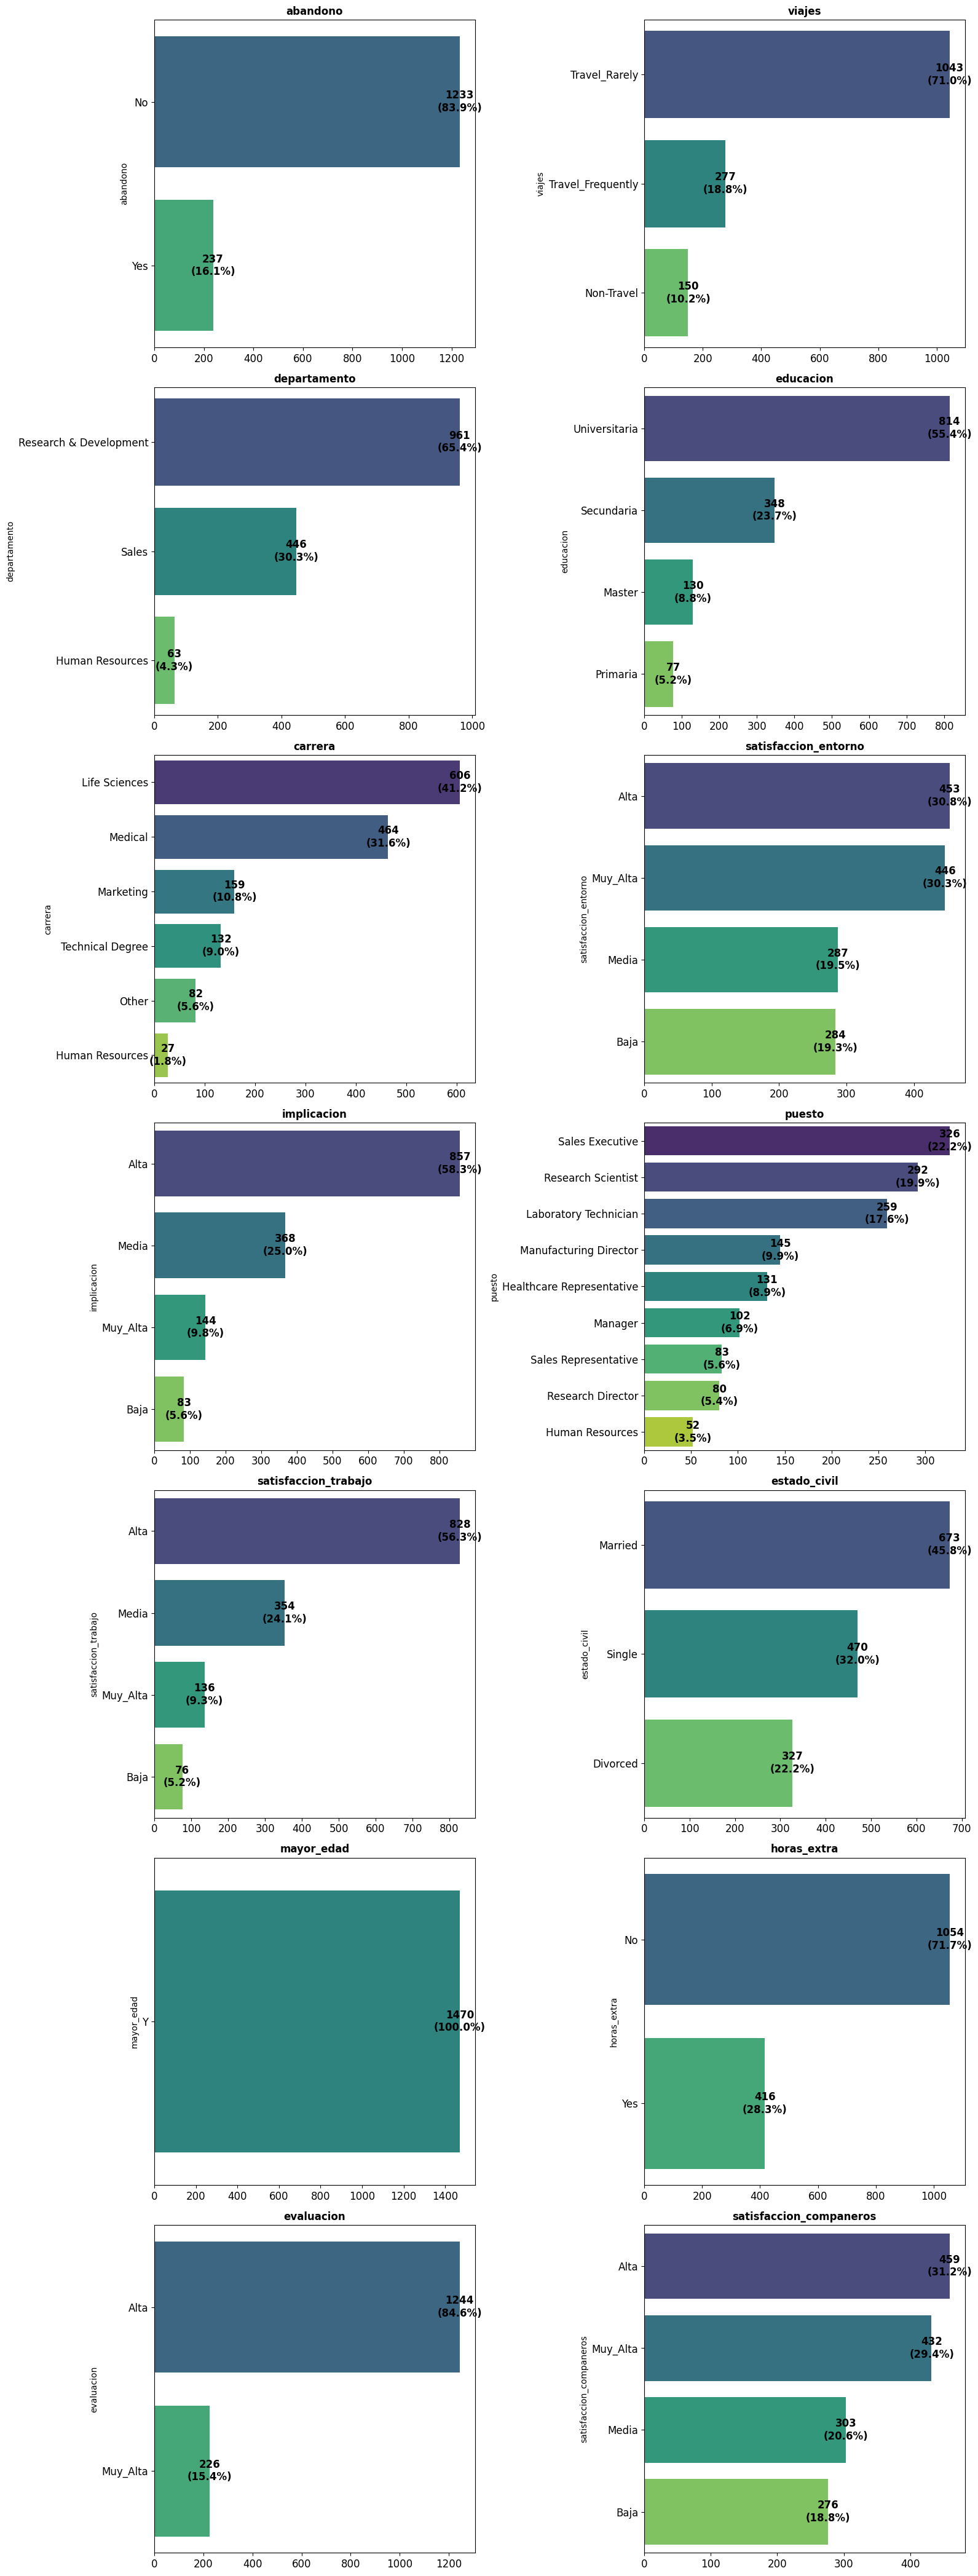

In [20]:
# Uso de la función
# Seleccionar solo las columnas categóricas del DataFrame
df_categoricas = df.select_dtypes('O')

# Pasar el DataFrame filtrado a la función de EDA
graficos_eda_categoricos(df_categoricas)

Conclusiones:

- mayor_edad --> eliminamos
- imputamos educación por Universitaria
- imputamos satisfaccion_trabajo por Alta
- imputamos implicacion por Alta

In [21]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores   147

In [23]:
def graficos_eda_categoricos(cat):
    """
    Realiza un análisis exploratorio de datos (EDA) para variables categóricas en un DataFrame.

    Parámetros:
    cat (pd.DataFrame): DataFrame de pandas que contiene las variables categóricas a analizar.
    """
    # Calculamos el número de filas que necesitamos
    filas = ceil(cat.shape[1] / 2)

    # Definimos el gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))

    # Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    # Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        counts = cat[variable].value_counts()
        percentages = cat[variable].value_counts(normalize=True) * 100

        sns.barplot(x=counts.values, y=counts.index, ax=ax[cada], palette="viridis")

        for i in ax[cada].patches:
            ax[cada].text(i.get_width() + 0.1, i.get_y() + i.get_height() / 2,
                          f'{int(i.get_width())}\n({i.get_width() / len(cat) * 100:.1f}%)',
                          ha='center', va='center', fontsize=12, color='black', weight='bold')

        ax[cada].set_title(variable, fontsize=12, fontweight="bold")
        ax[cada].tick_params(labelsize = 12)

    # Ajustamos el layout
    plt.tight_layout()
    plt.show()

<ipython-input-23-fc92ce80a9d3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax[cada], palette="viridis")
<ipython-input-23-fc92ce80a9d3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax[cada], palette="viridis")
<ipython-input-23-fc92ce80a9d3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, ax=ax[cada], palette="viridis")
<ipython-input-23-fc92ce80a9d3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

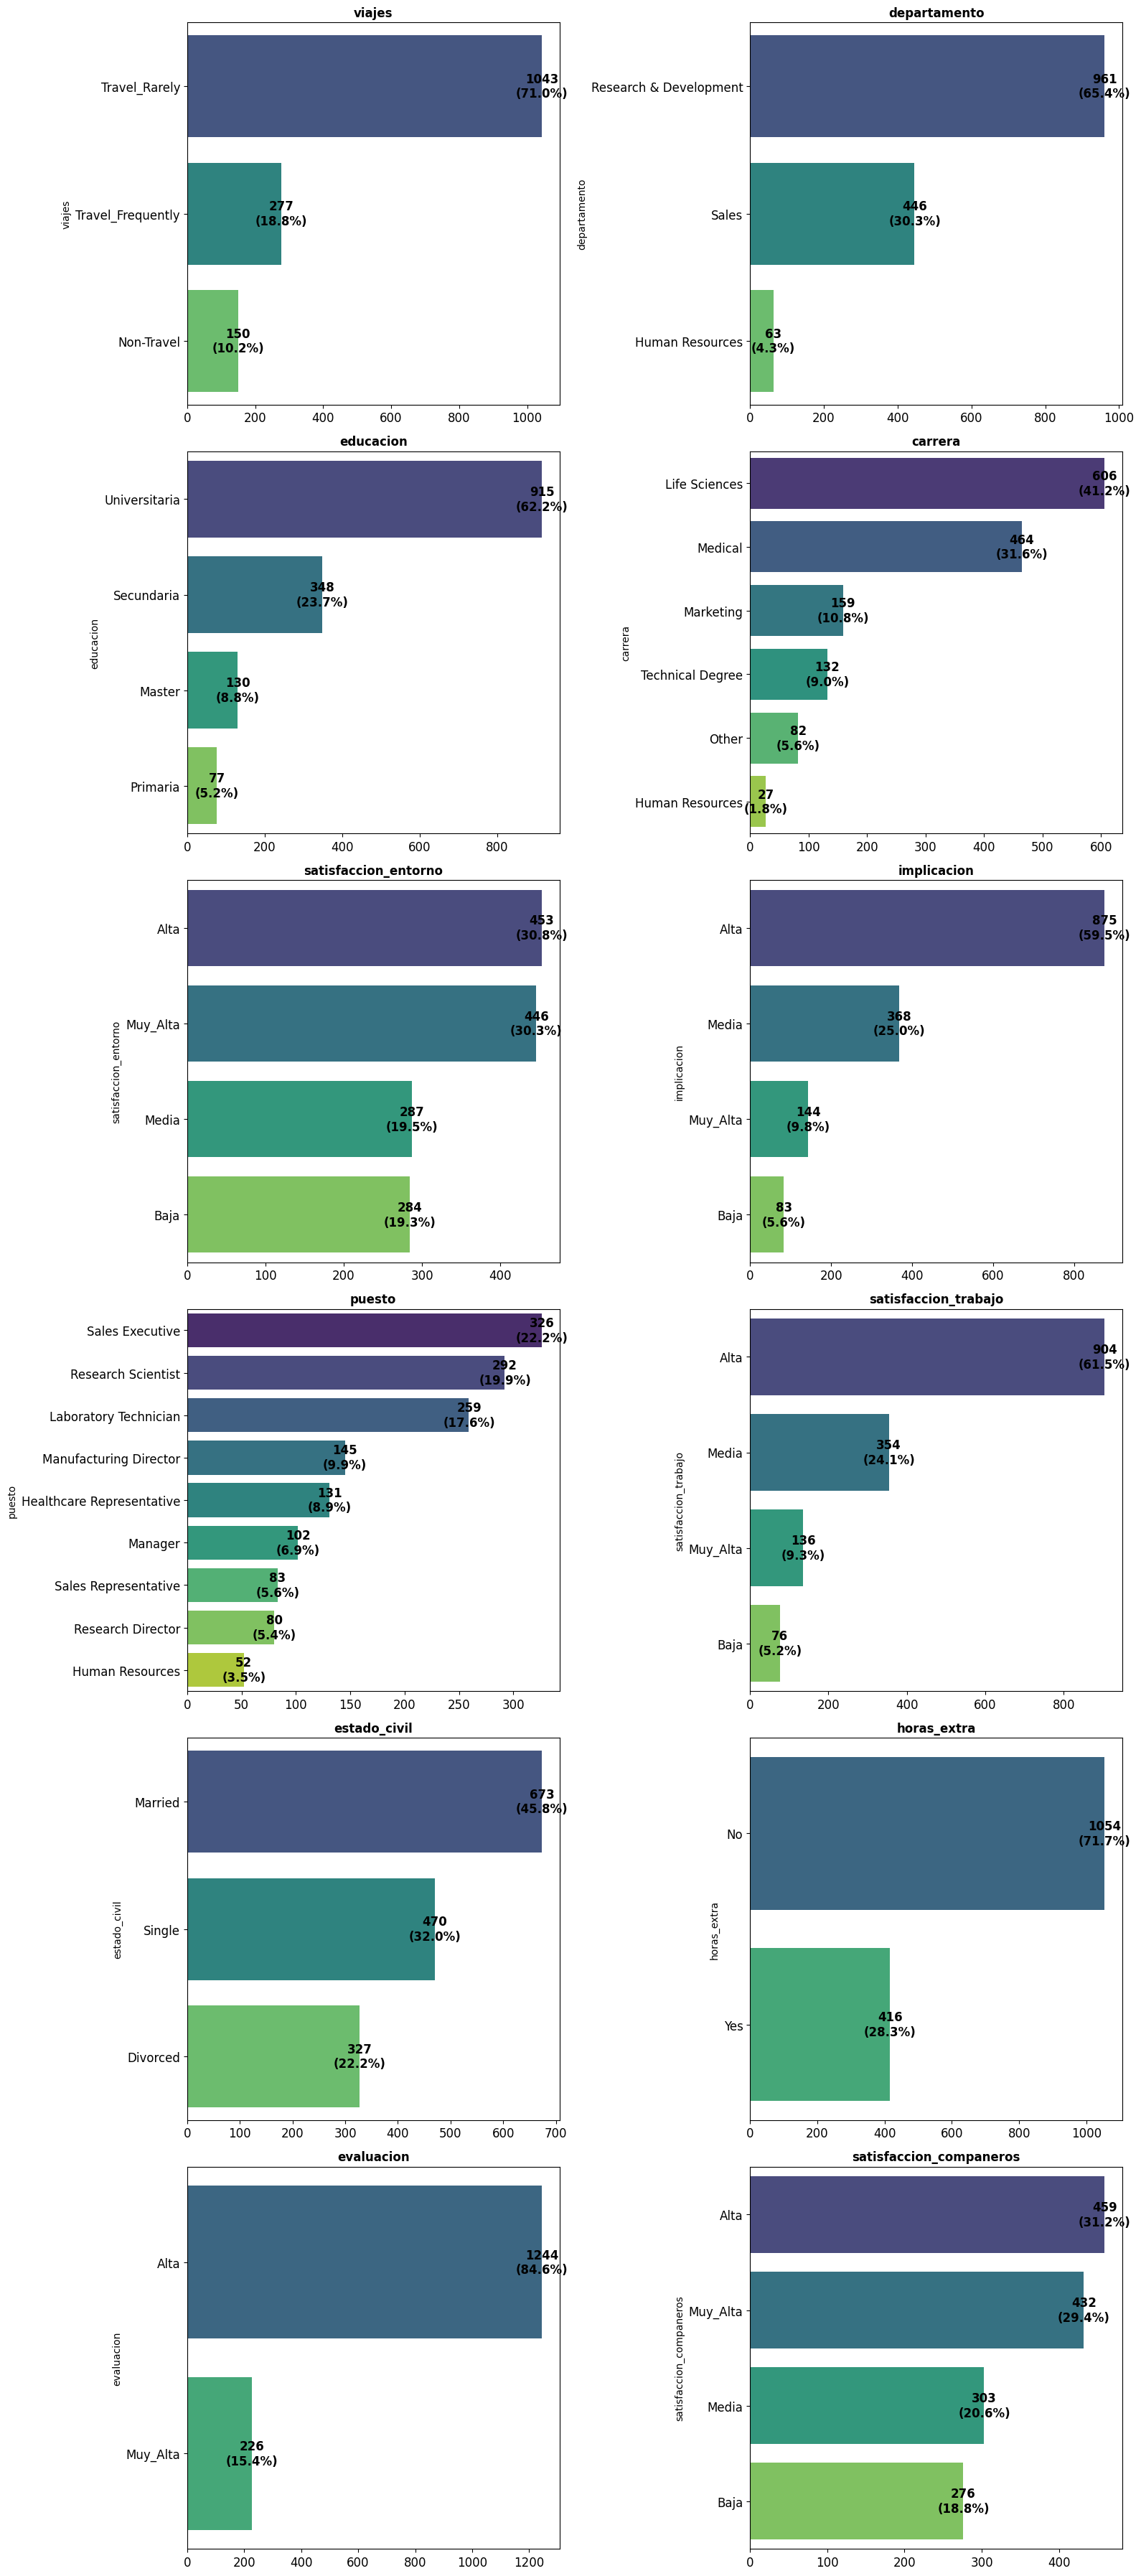

In [37]:
# Uso de la función
# Seleccionar solo las columnas categóricas del DataFrame
df_categoricas = df.select_dtypes('O')

# Pasar el DataFrame filtrado a la función de EDA
graficos_eda_categoricos(df_categoricas)

## EDA VARIABLES NUMÉRICAS

In [25]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [26]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0
anos_experiencia,1470.0,11.279592,10.0,7.780782,0.0,6.0,10.0,15.0,40.0
num_formaciones_ult_ano,1470.0,2.799320,3.0,1.289271,0.0,2.0,3.0,3.0,6.0
anos_compania,1470.0,7.008163,5.0,6.126525,0.0,3.0,5.0,9.0,40.0


Conclusiones:

Empleados solo tiene un valor --> Eliminarla

Sexo tiene 4 valores --> Eliminarla

Horas quincena solo tiene una valor --> Eliminarla

De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada

In [38]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

KeyError: "['empleados', 'sexo', 'horas_quincena'] not found in axis"

In [16]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0
anos_experiencia,1470.0,11.279592,10.0,7.780782,0.0,6.0,10.0,15.0,40.0
num_formaciones_ult_ano,1470.0,2.799320,3.0,1.289271,0.0,2.0,3.0,3.0,6.0
anos_compania,1470.0,7.008163,5.0,6.126525,0.0,3.0,5.0,9.0,40.0


In [17]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


## GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cuál es la tasa de abandono?

In [39]:
df.abandono.value_counts(normalize = True) * 100

abandono
0    83.877551
1    16.122449
Name: proportion, dtype: float64

### ¿Hay un perfil tipo de empleado que deja la empresa?

#### Análisis por Educación

               No Abandona (%)  Abandona (%)
educacion                                   
Master               91.538462      8.461538
Primaria             67.532468     32.467532
Secundaria           80.459770     19.540230
Universitaria        85.464481     14.535519


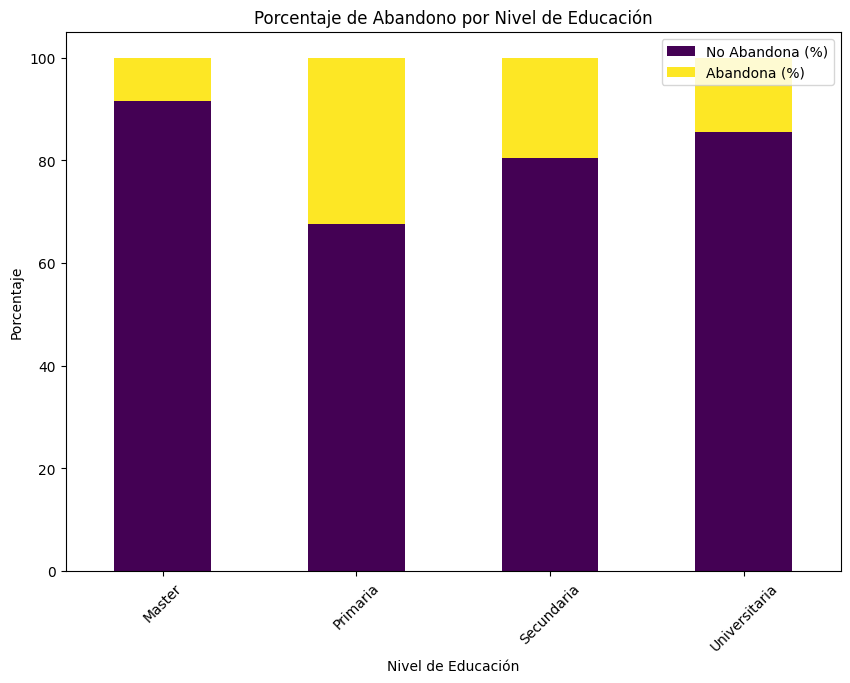


Los empleados con educación Primaria tienen el mayor porcentaje de abandono: 32.47%.
Los empleados con educación Master tienen el menor porcentaje de abandono: 8.46%.


In [69]:
def analizar_abandono_por_educacion(df):
    """
    Analiza la relación entre el nivel de educación y el abandono de la empresa.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    """
    # Crear una tabla cruzada
    crosstab = pd.crosstab(df['educacion'], df['abandono'], normalize='index') * 100
    crosstab.columns = ['No Abandona (%)', 'Abandona (%)']
    print(crosstab)

    # Visualizar la tabla cruzada
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
    plt.title('Porcentaje de Abandono por Nivel de Educación')
    plt.xlabel('Nivel de Educación')
    plt.ylabel('Porcentaje')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.show()

    # Insights
    abandono_max = crosstab['Abandona (%)'].idxmax()
    abandono_min = crosstab['Abandona (%)'].idxmin()

    print(f"\nLos empleados con educación {abandono_max} tienen el mayor porcentaje de abandono: {crosstab.loc[abandono_max, 'Abandona (%)']:.2f}%.")
    print(f"Los empleados con educación {abandono_min} tienen el menor porcentaje de abandono: {crosstab.loc[abandono_min, 'Abandona (%)']:.2f}%.")


# Uso de la función
# df es el DataFrame que contiene tus datos, asegurate de tener las columnas 'educacion' y 'abandono'
analizar_abandono_por_educacion(df)

#### Análisis por Edad

                No Abandona (%)  Abandona (%)
grupo_edad                                   
(17.958, 22.2]        52.631579     47.368421
(22.2, 26.4]          72.380952     27.619048
(26.4, 30.6]          80.357143     19.642857
(30.6, 34.8]          81.132075     18.867925
(34.8, 39.0]          89.898990     10.101010
(39.0, 43.2]          91.428571      8.571429
(43.2, 47.4]          88.549618     11.450382
(47.4, 51.6]          88.043478     11.956522
(51.6, 55.8]          89.610390     10.389610
(55.8, 60.0]          82.978723     17.021277


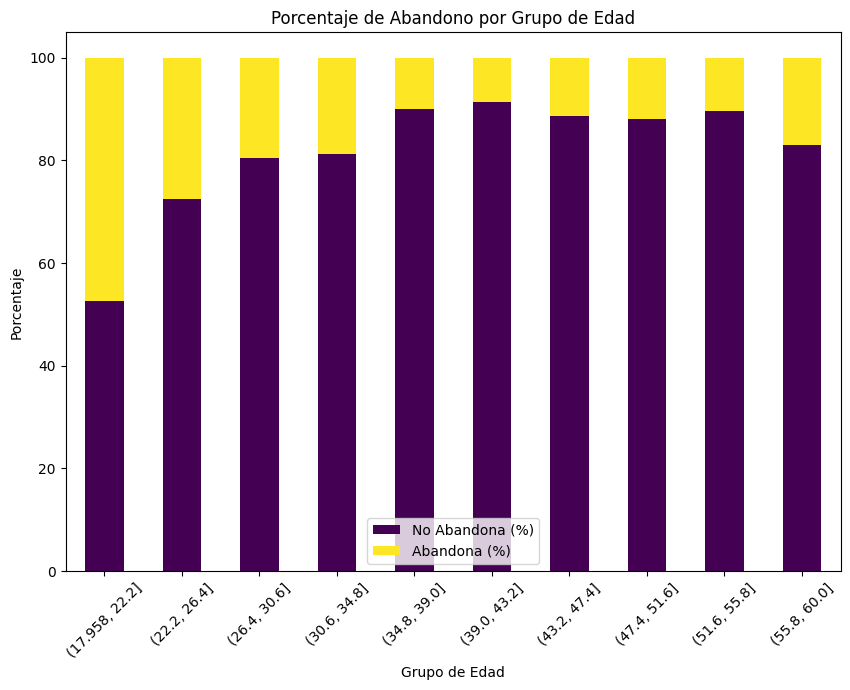


Los empleados en el grupo de edad (17.958, 22.2] tienen el mayor porcentaje de abandono: 47.37%.
Los empleados en el grupo de edad (39.0, 43.2] tienen el menor porcentaje de abandono: 8.57%.


In [70]:
def analizar_abandono_por_edad(df, bins=10):
    """
    Analiza la relación entre la edad y el abandono de la empresa.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    bins (int): Número de intervalos de edad para agrupar los datos.
    """
    # Crear categorías de edad
    df['grupo_edad'] = pd.cut(df['edad'], bins=bins)

    # Crear una tabla cruzada
    crosstab = pd.crosstab(df['grupo_edad'], df['abandono'], normalize='index') * 100
    crosstab.columns = ['No Abandona (%)', 'Abandona (%)']
    print(crosstab)

    # Visualizar la tabla cruzada
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
    plt.title('Porcentaje de Abandono por Grupo de Edad')
    plt.xlabel('Grupo de Edad')
    plt.ylabel('Porcentaje')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.show()

    # Insights
    abandono_max = crosstab['Abandona (%)'].idxmax()
    abandono_min = crosstab['Abandona (%)'].idxmin()

    print(f"\nLos empleados en el grupo de edad {abandono_max} tienen el mayor porcentaje de abandono: {crosstab.loc[abandono_max, 'Abandona (%)']:.2f}%.")
    print(f"Los empleados en el grupo de edad {abandono_min} tienen el menor porcentaje de abandono: {crosstab.loc[abandono_min, 'Abandona (%)']:.2f}%.")

# Uso de la función
# df es el DataFrame que contiene tus datos, asegúrate de tener las columnas 'edad' y 'abandono'
analizar_abandono_por_edad(df)

#### Análisis por Salario Mes

                    No Abandona (%)  Abandona (%)
grupo_salario                                    
(990.01, 2908.0]          70.684932     29.315068
(2908.0, 4807.0]          85.673352     14.326648
(4807.0, 6706.0]          89.655172     10.344828
(6706.0, 8605.0]          87.155963     12.844037
(8605.0, 10504.0]         80.909091     19.090909
(10504.0, 12403.0]        91.071429      8.928571
(12403.0, 14302.0]        90.384615      9.615385
(14302.0, 16201.0]       100.000000      0.000000
(16201.0, 18100.0]       100.000000      0.000000
(18100.0, 19999.0]        92.537313      7.462687


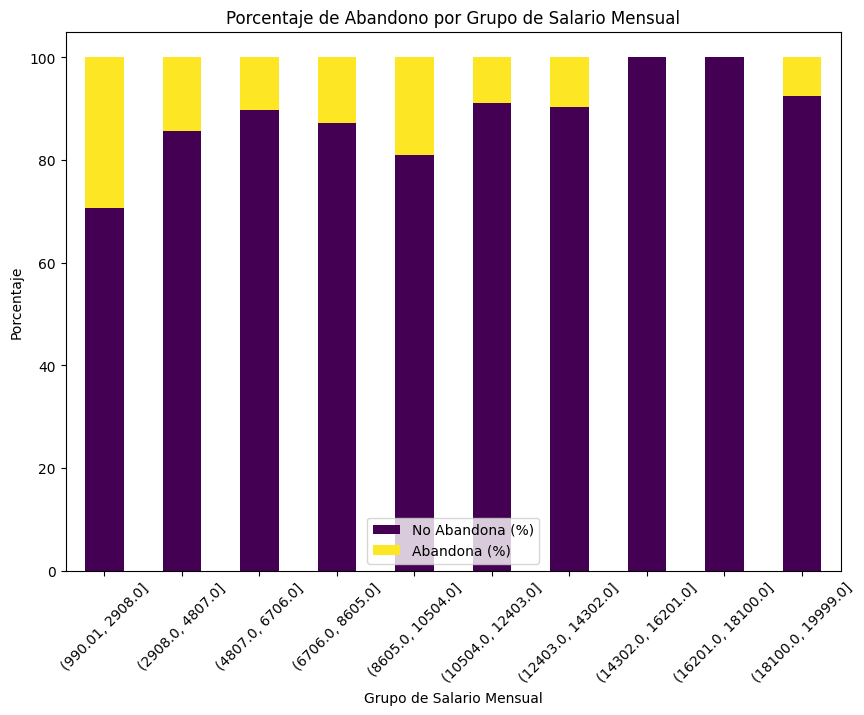


Los empleados en el grupo de salario mensual (990.01, 2908.0] tienen el mayor porcentaje de abandono: 29.32%.
Los empleados en el grupo de salario mensual (14302.0, 16201.0] tienen el menor porcentaje de abandono: 0.00%.


In [31]:
def analizar_abandono_por_salario(df, bins=10):
    """
    Analiza la relación entre el salario mensual y el abandono de la empresa.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    bins (int): Número de intervalos de salario para agrupar los datos.
    """
    # Crear categorías de salario
    df['grupo_salario'] = pd.cut(df['salario_mes'], bins=bins)

    # Crear una tabla cruzada
    crosstab = pd.crosstab(df['grupo_salario'], df['abandono'], normalize='index') * 100
    crosstab.columns = ['No Abandona (%)', 'Abandona (%)']
    print(crosstab)

    # Visualizar la tabla cruzada
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
    plt.title('Porcentaje de Abandono por Grupo de Salario Mensual')
    plt.xlabel('Grupo de Salario Mensual')
    plt.ylabel('Porcentaje')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.show()

    # Insights
    abandono_max = crosstab['Abandona (%)'].idxmax()
    abandono_min = crosstab['Abandona (%)'].idxmin()

    print(f"\nLos empleados en el grupo de salario mensual {abandono_max} tienen el mayor porcentaje de abandono: {crosstab.loc[abandono_max, 'Abandona (%)']:.2f}%.")
    print(f"Los empleados en el grupo de salario mensual {abandono_min} tienen el menor porcentaje de abandono: {crosstab.loc[abandono_min, 'Abandona (%)']:.2f}%.")

# Uso de la función
# df es el DataFrame que contiene tus datos, asegurate de tener las columnas 'salario_mes' y 'abandono'
analizar_abandono_por_salario(df)

#### Análisis por Satisfaccion Compañeros

                         No Abandona (%)  Abandona (%)
satisfaccion_companeros                               
Alta                           84.531590     15.468410
Baja                           79.347826     20.652174
Media                          85.148515     14.851485
Muy_Alta                       85.185185     14.814815


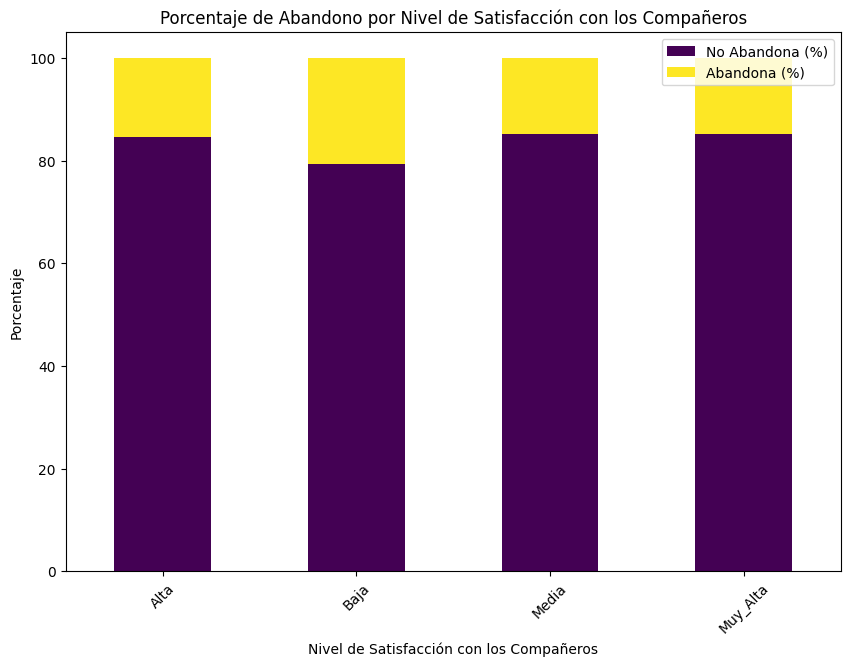


Los empleados con satisfacción Baja tienen el mayor porcentaje de abandono: 20.65%.
Los empleados con satisfacción Muy_Alta tienen el menor porcentaje de abandono: 14.81%.


In [74]:
def analizar_abandono_por_satisfaccion_companeros(df):
    """
    Analiza la relación entre la satisfacción con los compañeros y el abandono de la empresa.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    """
    # Crear una tabla cruzada
    crosstab = pd.crosstab(df['satisfaccion_companeros'], df['abandono'], normalize='index') * 100
    crosstab.columns = ['No Abandona (%)', 'Abandona (%)']
    print(crosstab)

    # Visualizar la tabla cruzada
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
    plt.title('Porcentaje de Abandono por Nivel de Satisfacción con los Compañeros')
    plt.xlabel('Nivel de Satisfacción con los Compañeros')
    plt.ylabel('Porcentaje')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.show()

    # Insights
    abandono_max = crosstab['Abandona (%)'].idxmax()
    abandono_min = crosstab['Abandona (%)'].idxmin()

    print(f"\nLos empleados con satisfacción {abandono_max} tienen el mayor porcentaje de abandono: {crosstab.loc[abandono_max, 'Abandona (%)']:.2f}%.")
    print(f"Los empleados con satisfacción {abandono_min} tienen el menor porcentaje de abandono: {crosstab.loc[abandono_min, 'Abandona (%)']:.2f}%.")

# Uso de la función
# df es el DataFrame que contiene tus datos, asegurate de tener las columnas 'satisfaccion_companeros' y 'abandono'
analizar_abandono_por_satisfaccion_companeros(df)

#### Análisis General


Análisis de abandono por estado_civil
              No Abandona (%)  Abandona (%)
estado_civil                               
Single              74.468085     25.531915
Married             87.518574     12.481426
Divorced            89.908257     10.091743


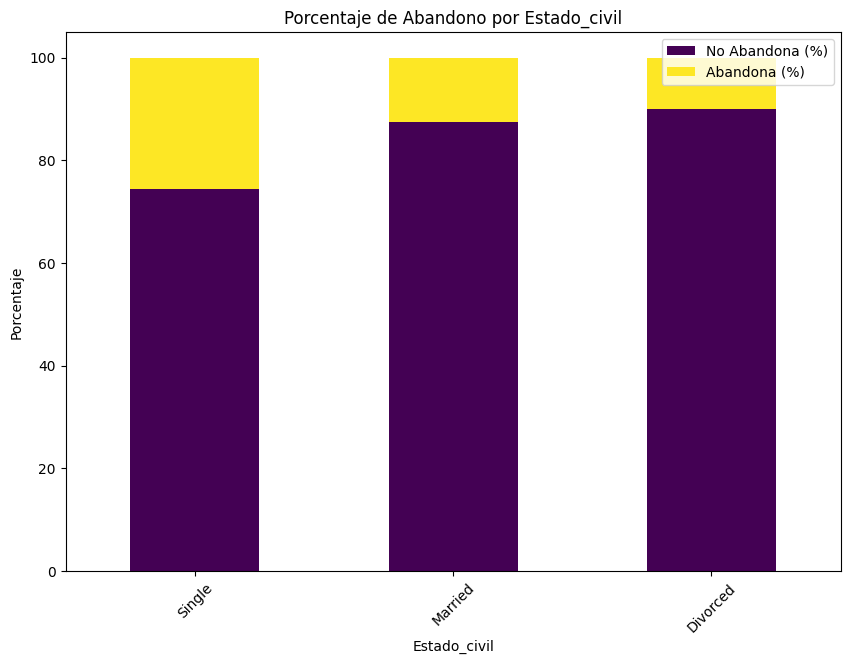

Los empleados con estado_civil Single tienen el mayor porcentaje de abandono: 25.53%.
Los empleados con estado_civil Divorced tienen el menor porcentaje de abandono: 10.09%.

Análisis de abandono por puesto
                           No Abandona (%)  Abandona (%)
puesto                                                  
Sales Representative             60.240964     39.759036
Laboratory Technician            76.061776     23.938224
Human Resources                  76.923077     23.076923
Sales Executive                  82.515337     17.484663
Research Scientist               83.904110     16.095890
Manufacturing Director           93.103448      6.896552
Healthcare Representative        93.129771      6.870229
Manager                          95.098039      4.901961
Research Director                97.500000      2.500000


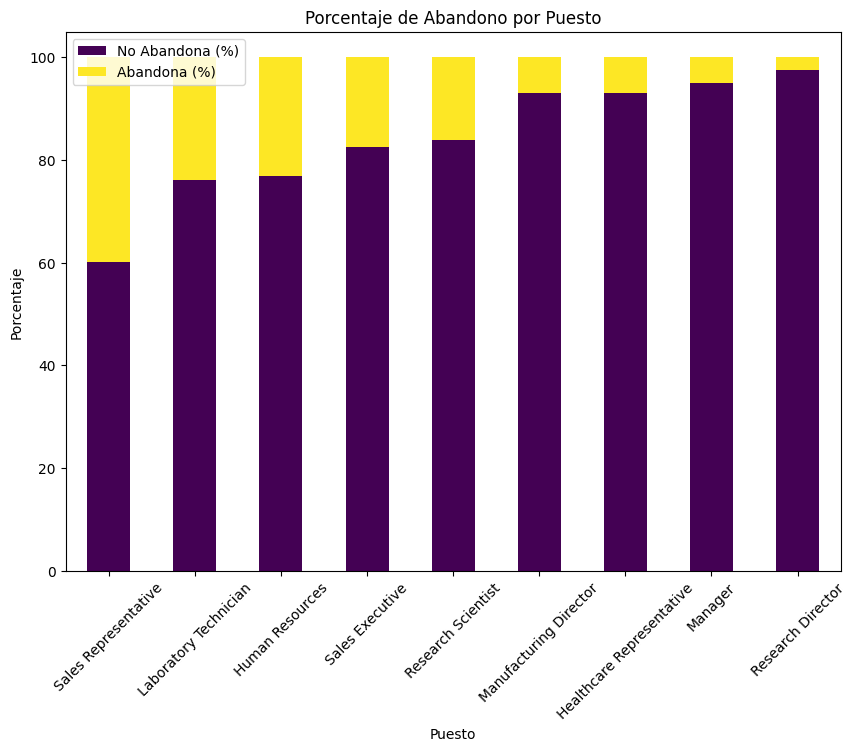

Los empleados con puesto Sales Representative tienen el mayor porcentaje de abandono: 39.76%.
Los empleados con puesto Research Director tienen el menor porcentaje de abandono: 2.50%.

Análisis de abandono por carrera
                  No Abandona (%)  Abandona (%)
carrera                                        
Human Resources         74.074074     25.925926
Technical Degree        75.757576     24.242424
Marketing               77.987421     22.012579
Life Sciences           85.313531     14.686469
Medical                 86.422414     13.577586
Other                   86.585366     13.414634


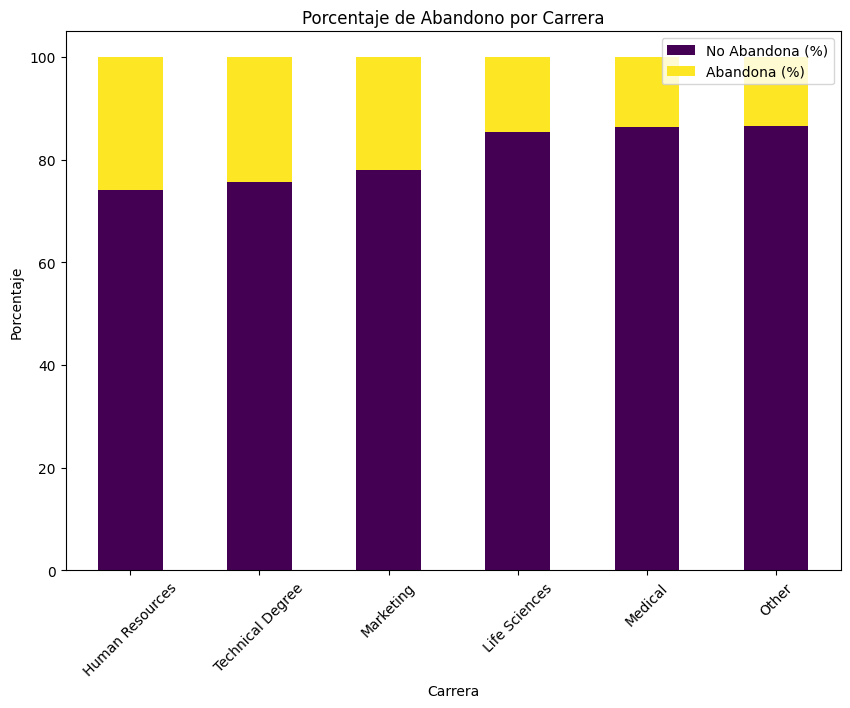

Los empleados con carrera Human Resources tienen el mayor porcentaje de abandono: 25.93%.
Los empleados con carrera Other tienen el menor porcentaje de abandono: 13.41%.

Análisis de abandono por departamento
                        No Abandona (%)  Abandona (%)
departamento                                         
Sales                         79.372197     20.627803
Human Resources               80.952381     19.047619
Research & Development        86.160250     13.839750


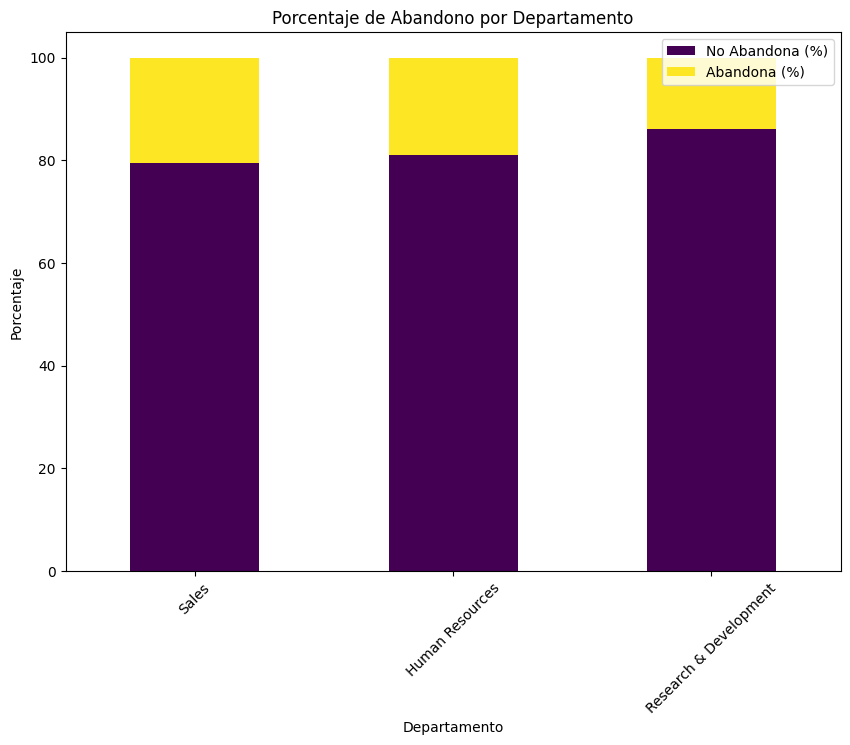

Los empleados con departamento Sales tienen el mayor porcentaje de abandono: 20.63%.
Los empleados con departamento Research & Development tienen el menor porcentaje de abandono: 13.84%.

Análisis de abandono por edad
                No Abandona (%)  Abandona (%)
grupo_edad                                   
(17.958, 22.2]        52.631579     47.368421
(22.2, 26.4]          72.380952     27.619048
(26.4, 30.6]          80.357143     19.642857
(30.6, 34.8]          81.132075     18.867925
(55.8, 60.0]          82.978723     17.021277
(47.4, 51.6]          88.043478     11.956522
(43.2, 47.4]          88.549618     11.450382
(51.6, 55.8]          89.610390     10.389610
(34.8, 39.0]          89.898990     10.101010
(39.0, 43.2]          91.428571      8.571429


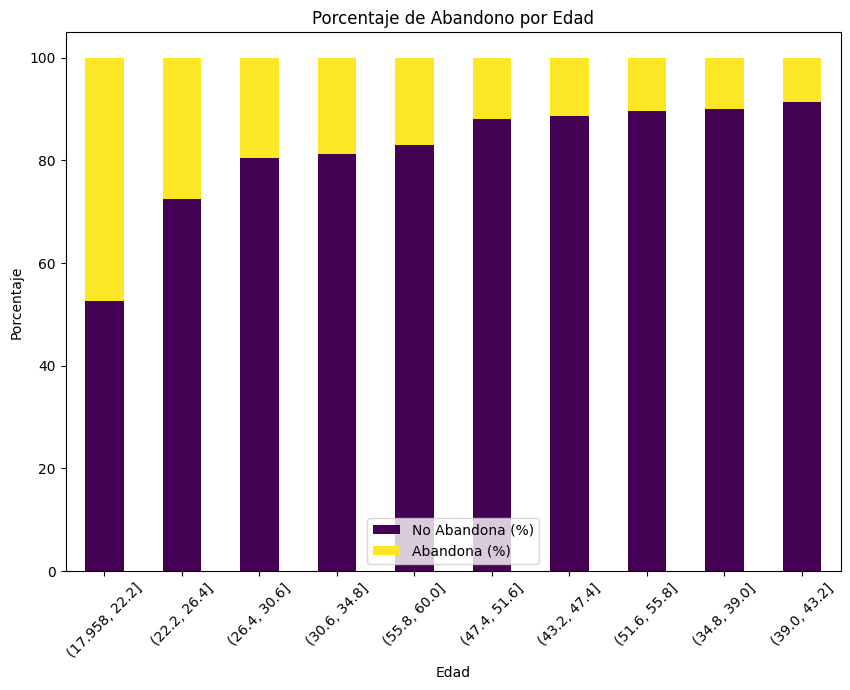

Los empleados con edad (17.958, 22.2] tienen el mayor porcentaje de abandono: 47.37%.
Los empleados con edad (39.0, 43.2] tienen el menor porcentaje de abandono: 8.57%.

Análisis de abandono por salario_mes
                    No Abandona (%)  Abandona (%)
grupo_salario_mes                                
(990.01, 2908.0]          70.684932     29.315068
(8605.0, 10504.0]         80.909091     19.090909
(2908.0, 4807.0]          85.673352     14.326648
(6706.0, 8605.0]          87.155963     12.844037
(4807.0, 6706.0]          89.655172     10.344828
(12403.0, 14302.0]        90.384615      9.615385
(10504.0, 12403.0]        91.071429      8.928571
(18100.0, 19999.0]        92.537313      7.462687
(14302.0, 16201.0]       100.000000      0.000000
(16201.0, 18100.0]       100.000000      0.000000


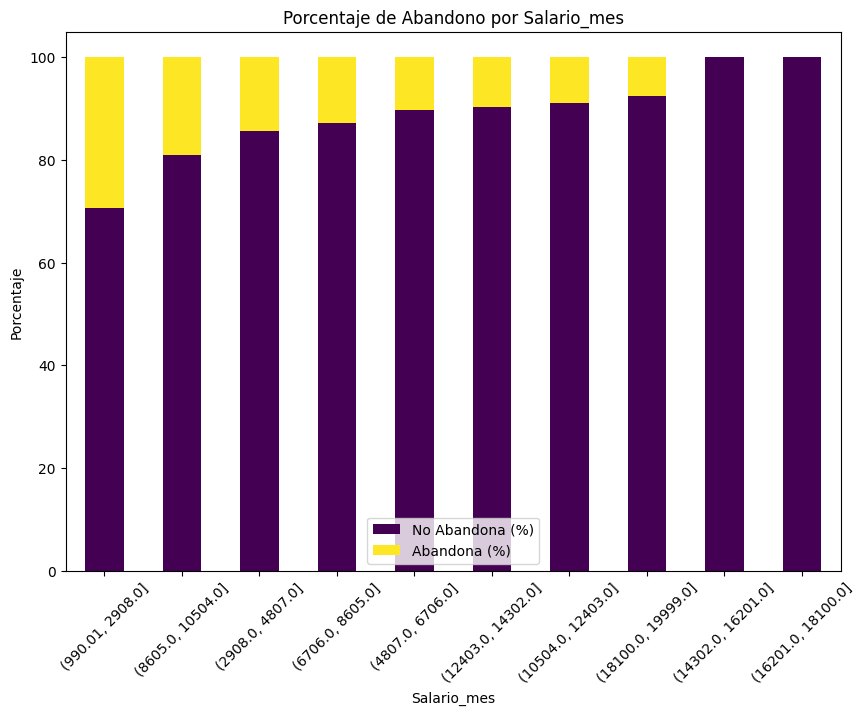

Los empleados con salario_mes (990.01, 2908.0] tienen el mayor porcentaje de abandono: 29.32%.
Los empleados con salario_mes (14302.0, 16201.0] tienen el menor porcentaje de abandono: 0.00%.

Análisis de abandono por satisfaccion_companeros
                               No Abandona (%)  Abandona (%)
grupo_satisfaccion_companeros                               
Baja                                 79.347826     20.652174
Alta                                 84.531590     15.468410
Media                                85.148515     14.851485
Muy_Alta                             85.185185     14.814815


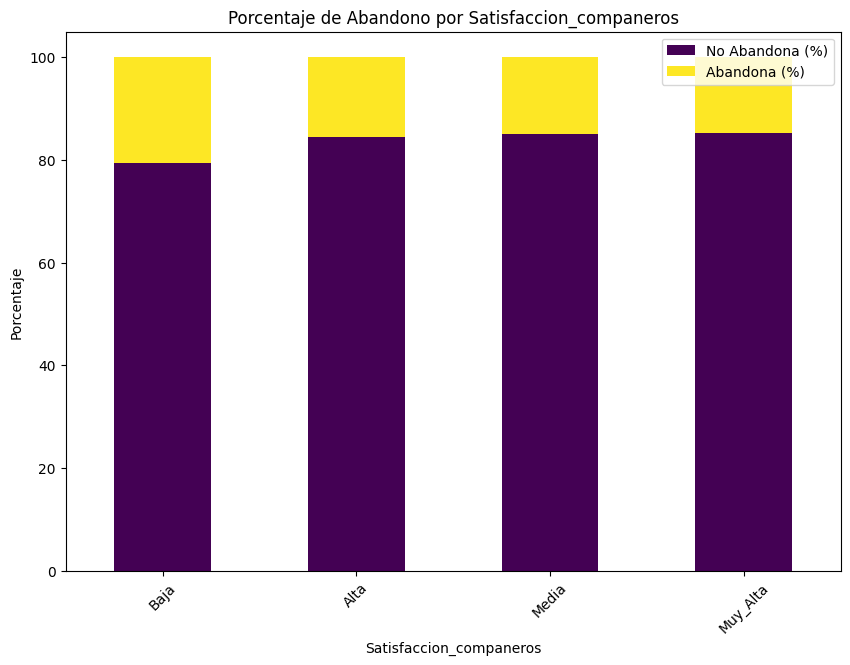

Los empleados con satisfaccion_companeros Baja tienen el mayor porcentaje de abandono: 20.65%.
Los empleados con satisfaccion_companeros Muy_Alta tienen el menor porcentaje de abandono: 14.81%.

Análisis de abandono por satisfaccion_trabajo
                            No Abandona (%)  Abandona (%)
grupo_satisfaccion_trabajo                               
Baja                              65.789474     34.210526
Media                             81.073446     18.926554
Alta                              85.398230     14.601770
Muy_Alta                          91.176471      8.823529


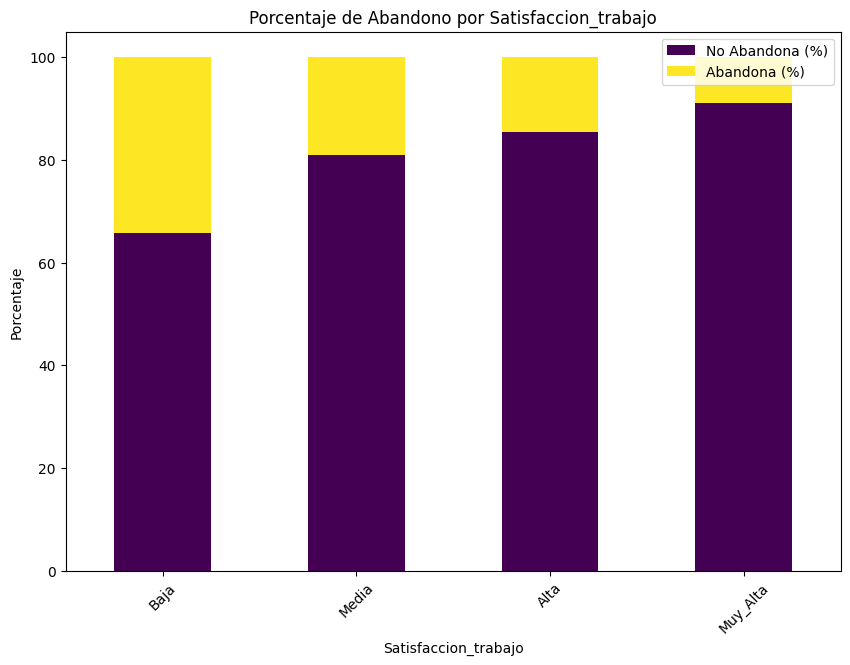

Los empleados con satisfaccion_trabajo Baja tienen el mayor porcentaje de abandono: 34.21%.
Los empleados con satisfaccion_trabajo Muy_Alta tienen el menor porcentaje de abandono: 8.82%.

Análisis de abandono por implicacion
                   No Abandona (%)  Abandona (%)
grupo_implicacion                               
Baja                     66.265060     33.734940
Media                    80.706522     19.293478
Alta                     85.714286     14.285714
Muy_Alta                 90.972222      9.027778


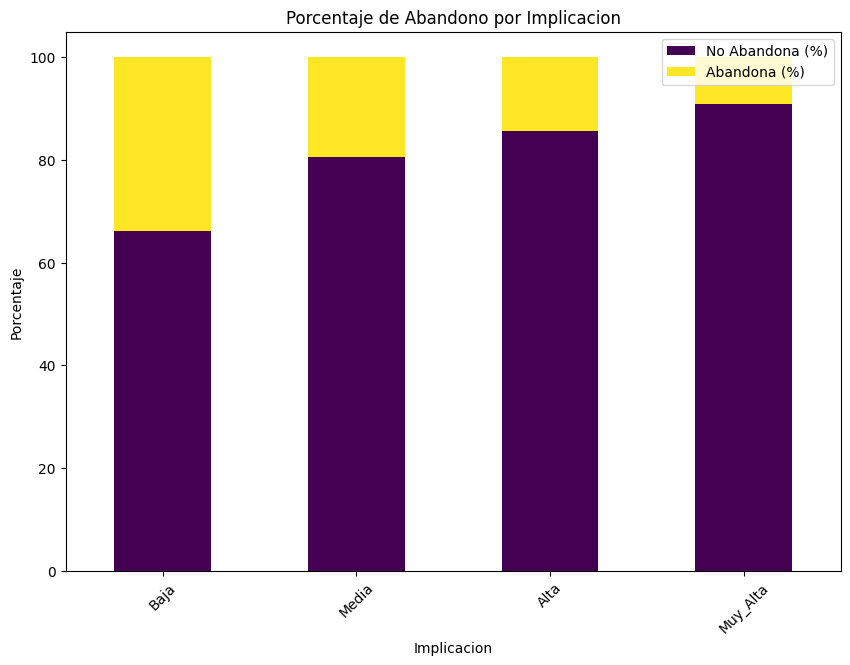

Los empleados con implicacion Baja tienen el mayor porcentaje de abandono: 33.73%.
Los empleados con implicacion Muy_Alta tienen el menor porcentaje de abandono: 9.03%.


In [76]:
def analizar_abandono(df, bins=10):
    """
    Analiza la relación entre varias variables y el abandono de la empresa.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    bins (int): Número de intervalos para agrupar las variables numéricas.
    """
    variables_categoricas = ['estado_civil', 'puesto', 'carrera', 'departamento']
    variables_continuas = ['edad', 'salario_mes', 'satisfaccion_companeros', 'satisfaccion_trabajo', 'implicacion']

    # Análisis para variables categóricas
    for var in variables_categoricas:
        print(f"\nAnálisis de abandono por {var}")
        crosstab = pd.crosstab(df[var], df['abandono'], normalize='index') * 100
        crosstab.columns = ['No Abandona (%)', 'Abandona (%)']

        # Ordenar por el porcentaje de abandono
        crosstab = crosstab.sort_values(by='Abandona (%)', ascending=False)

        print(crosstab)

        crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
        plt.title(f'Porcentaje de Abandono por {var.capitalize()}')
        plt.xlabel(var.capitalize())
        plt.ylabel('Porcentaje')
        plt.legend(loc='best')
        plt.xticks(rotation=45)
        plt.show()

        abandono_max = crosstab['Abandona (%)'].idxmax()
        abandono_min = crosstab['Abandona (%)'].idxmin()

        print(f"Los empleados con {var} {abandono_max} tienen el mayor porcentaje de abandono: {crosstab.loc[abandono_max, 'Abandona (%)']:.2f}%.")
        print(f"Los empleados con {var} {abandono_min} tienen el menor porcentaje de abandono: {crosstab.loc[abandono_min, 'Abandona (%)']:.2f}%.")

    # Análisis para variables continuas
    for var in variables_continuas:
        print(f"\nAnálisis de abandono por {var}")
        df[f'grupo_{var}'] = pd.cut(df[var], bins=bins) if df[var].dtype != 'O' else df[var]
        crosstab = pd.crosstab(df[f'grupo_{var}'], df['abandono'], normalize='index') * 100
        crosstab.columns = ['No Abandona (%)', 'Abandona (%)']

        # Ordenar por el porcentaje de abandono
        crosstab = crosstab.sort_values(by='Abandona (%)', ascending=False)

        print(crosstab)

        crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
        plt.title(f'Porcentaje de Abandono por {var.capitalize()}')
        plt.xlabel(var.capitalize())
        plt.ylabel('Porcentaje')
        plt.legend(loc='best')
        plt.xticks(rotation=45)
        plt.show()

        abandono_max = crosstab['Abandona (%)'].idxmax()
        abandono_min = crosstab['Abandona (%)'].idxmin()

        print(f"Los empleados con {var} {abandono_max} tienen el mayor porcentaje de abandono: {crosstab.loc[abandono_max, 'Abandona (%)']:.2f}%.")
        print(f"Los empleados con {var} {abandono_min} tienen el menor porcentaje de abandono: {crosstab.loc[abandono_min, 'Abandona (%)']:.2f}%.")

# Uso de la función
# df es el DataFrame que contiene tus datos, asegurate de tener las columnas necesarias
analizar_abandono(df)

#### Análisis de abandono salario y puesto


Análisis de salario para el puesto: Sales Representative
                   No Abandona (%)  Abandona (%)
grupo_salario                                   
(1046.42, 1610.0]        28.571429     71.428571
(1610.0, 2168.0]         36.363636     63.636364
(2726.0, 3284.0]         63.636364     36.363636
(2168.0, 2726.0]         65.625000     34.375000
(3842.0, 4400.0]         66.666667     33.333333
(3284.0, 3842.0]         80.000000     20.000000
(4400.0, 4958.0]        100.000000      0.000000
(4958.0, 5516.0]        100.000000      0.000000
(6074.0, 6632.0]        100.000000      0.000000


<ipython-input-77-ff284d675241>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puesto['grupo_salario'] = pd.cut(df_puesto['salario_mes'], bins=bins)


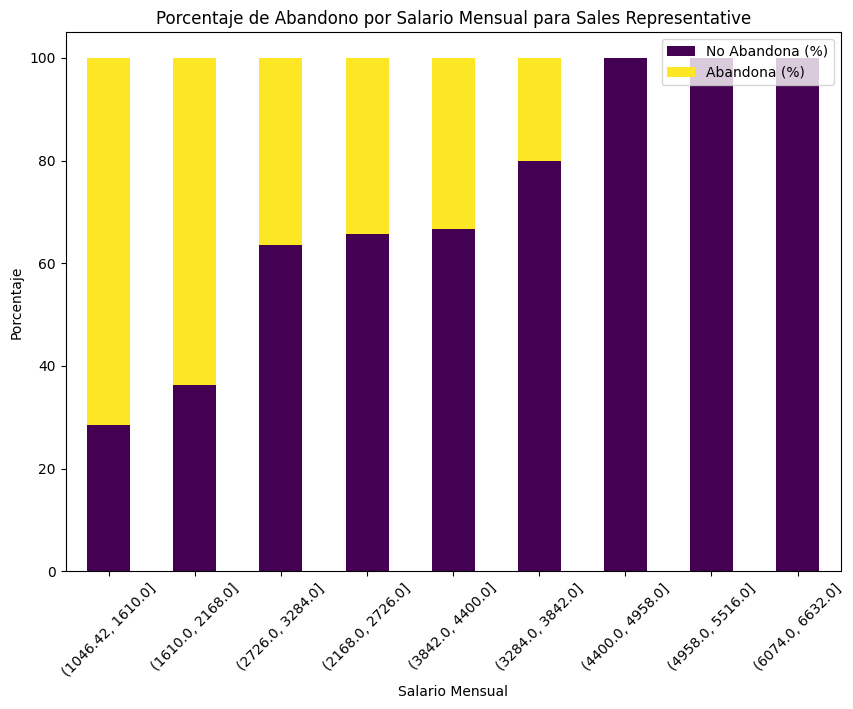

Los empleados en el grupo de salario (1046.42, 1610.0] en Sales Representative tienen el mayor porcentaje de abandono: 71.43%.
Los empleados en el grupo de salario (4400.0, 4958.0] en Sales Representative tienen el menor porcentaje de abandono: 0.00%.

Análisis de salario para el puesto: Human Resources
                   No Abandona (%)  Abandona (%)
grupo_salario                                   
(9808.0, 10725.0]        33.333333     66.666667
(2472.0, 3389.0]         61.538462     38.461538
(1545.83, 2472.0]        64.285714     35.714286
(3389.0, 4306.0]        100.000000      0.000000
(4306.0, 5223.0]        100.000000      0.000000
(5223.0, 6140.0]        100.000000      0.000000
(6140.0, 7057.0]        100.000000      0.000000
(7974.0, 8891.0]        100.000000      0.000000
(8891.0, 9808.0]        100.000000      0.000000


<ipython-input-77-ff284d675241>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_puesto['grupo_salario'] = pd.cut(df_puesto['salario_mes'], bins=bins)


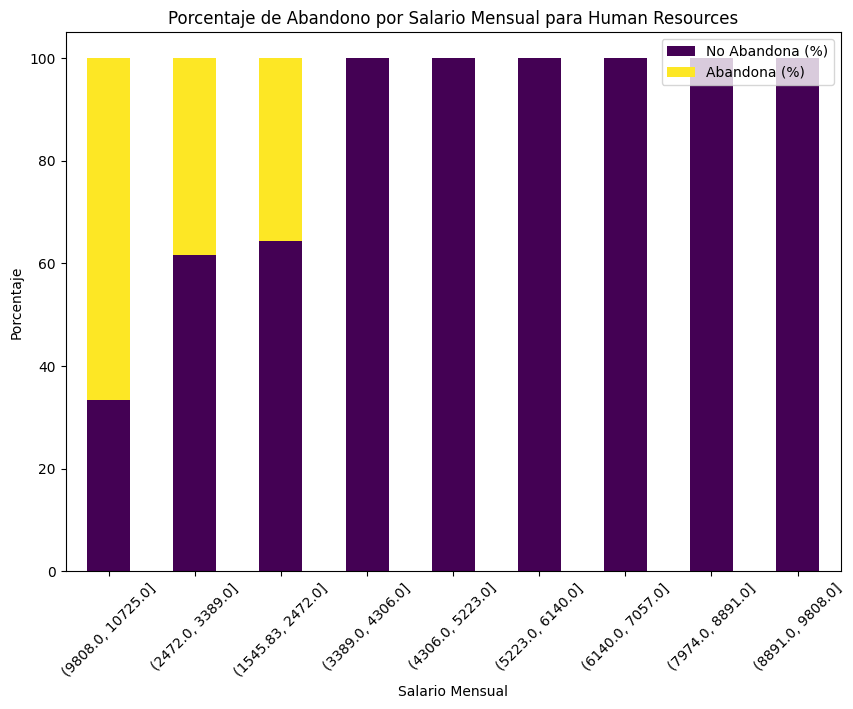

Los empleados en el grupo de salario (9808.0, 10725.0] en Human Resources tienen el mayor porcentaje de abandono: 66.67%.
Los empleados en el grupo de salario (3389.0, 4306.0] en Human Resources tienen el menor porcentaje de abandono: 0.00%.


In [77]:
def analizar_salario_por_puesto(df, puestos, bins=10):
    """
    Analiza la relación entre el salario mensual y el abandono de la empresa para puestos específicos.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    puestos (list): Lista de puestos a analizar.
    bins (int): Número de intervalos para agrupar las variables numéricas.
    """
    # Filtrar el DataFrame para los puestos específicos
    df_puestos = df[df['puesto'].isin(puestos)]

    for puesto in puestos:
        df_puesto = df_puestos[df_puestos['puesto'] == puesto]

        print(f"\nAnálisis de salario para el puesto: {puesto}")

        # Crear categorías de salario
        df_puesto['grupo_salario'] = pd.cut(df_puesto['salario_mes'], bins=bins)

        # Crear una tabla cruzada
        crosstab = pd.crosstab(df_puesto['grupo_salario'], df_puesto['abandono'], normalize='index') * 100
        crosstab.columns = ['No Abandona (%)', 'Abandona (%)']

        # Ordenar por el porcentaje de abandono
        crosstab = crosstab.sort_values(by='Abandona (%)', ascending=False)

        print(crosstab)

        # Visualizar la tabla cruzada
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
        plt.title(f'Porcentaje de Abandono por Salario Mensual para {puesto}')
        plt.xlabel('Salario Mensual')
        plt.ylabel('Porcentaje')
        plt.legend(loc='best')
        plt.xticks(rotation=45)
        plt.show()

        # Insights
        abandono_max = crosstab['Abandona (%)'].idxmax()
        abandono_min = crosstab['Abandona (%)'].idxmin()

        print(f"Los empleados en el grupo de salario {abandono_max} en {puesto} tienen el mayor porcentaje de abandono: {crosstab.loc[abandono_max, 'Abandona (%)']:.2f}%.")
        print(f"Los empleados en el grupo de salario {abandono_min} en {puesto} tienen el menor porcentaje de abandono: {crosstab.loc[abandono_min, 'Abandona (%)']:.2f}%.")

# Uso de la función
# df es el DataFrame que contiene tus datos, asegúrate de tener las columnas necesarias
puestos_a_analizar = ['Sales Representative', 'Human Resources']
analizar_salario_por_puesto(df, puestos_a_analizar)

#### Análisis de los puestos con menor salario

puesto
Sales Representative          2626.000000
Laboratory Technician         3237.169884
Research Scientist            3239.972603
Human Resources               4235.750000
Sales Executive               6924.279141
Manufacturing Director        7295.137931
Healthcare Representative     7528.763359
Research Director            16033.550000
Manager                      17181.676471
Name: salario_mes, dtype: float64


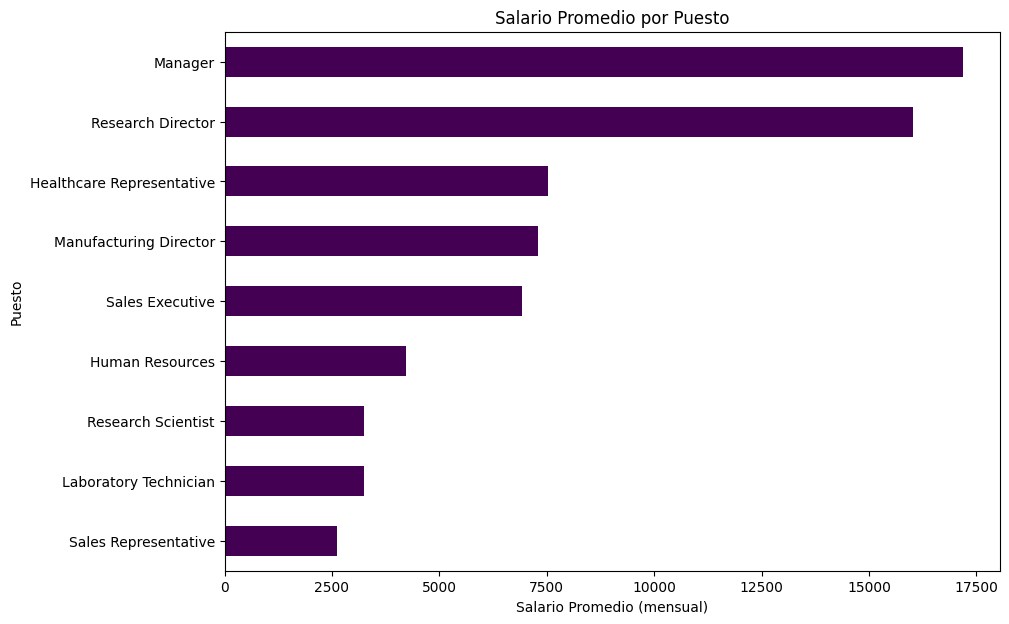


Puestos con los salarios más bajos:
puesto
Sales Representative     2626.000000
Laboratory Technician    3237.169884
Research Scientist       3239.972603
Human Resources          4235.750000
Sales Executive          6924.279141
Name: salario_mes, dtype: float64


In [78]:
def analizar_salarios_por_puesto(df):
    """
    Analiza y visualiza los salarios promedio por puesto en la empresa.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    """
    # Calcular el salario promedio por puesto
    salario_promedio_por_puesto = df.groupby('puesto')['salario_mes'].mean().sort_values()

    print(salario_promedio_por_puesto)

    # Visualizar los salarios promedio por puesto
    plt.figure(figsize=(10, 7))
    salario_promedio_por_puesto.plot(kind='barh', colormap='viridis')
    plt.title('Salario Promedio por Puesto')
    plt.xlabel('Salario Promedio (mensual)')
    plt.ylabel('Puesto')
    plt.show()

    # Puestos con los salarios más bajos
    puestos_menor_salario = salario_promedio_por_puesto.head(5)
    print("\nPuestos con los salarios más bajos:")
    print(puestos_menor_salario)

# Uso de la función
# df es el DataFrame que contiene tus datos, asegúrate de tener las columnas 'salario_mes' y 'puesto'
analizar_salarios_por_puesto(df)

#### Análisis de Edad por Puesto

<ipython-input-79-4bd20e6ff4d2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='puesto', y='edad', data=df, palette='viridis')


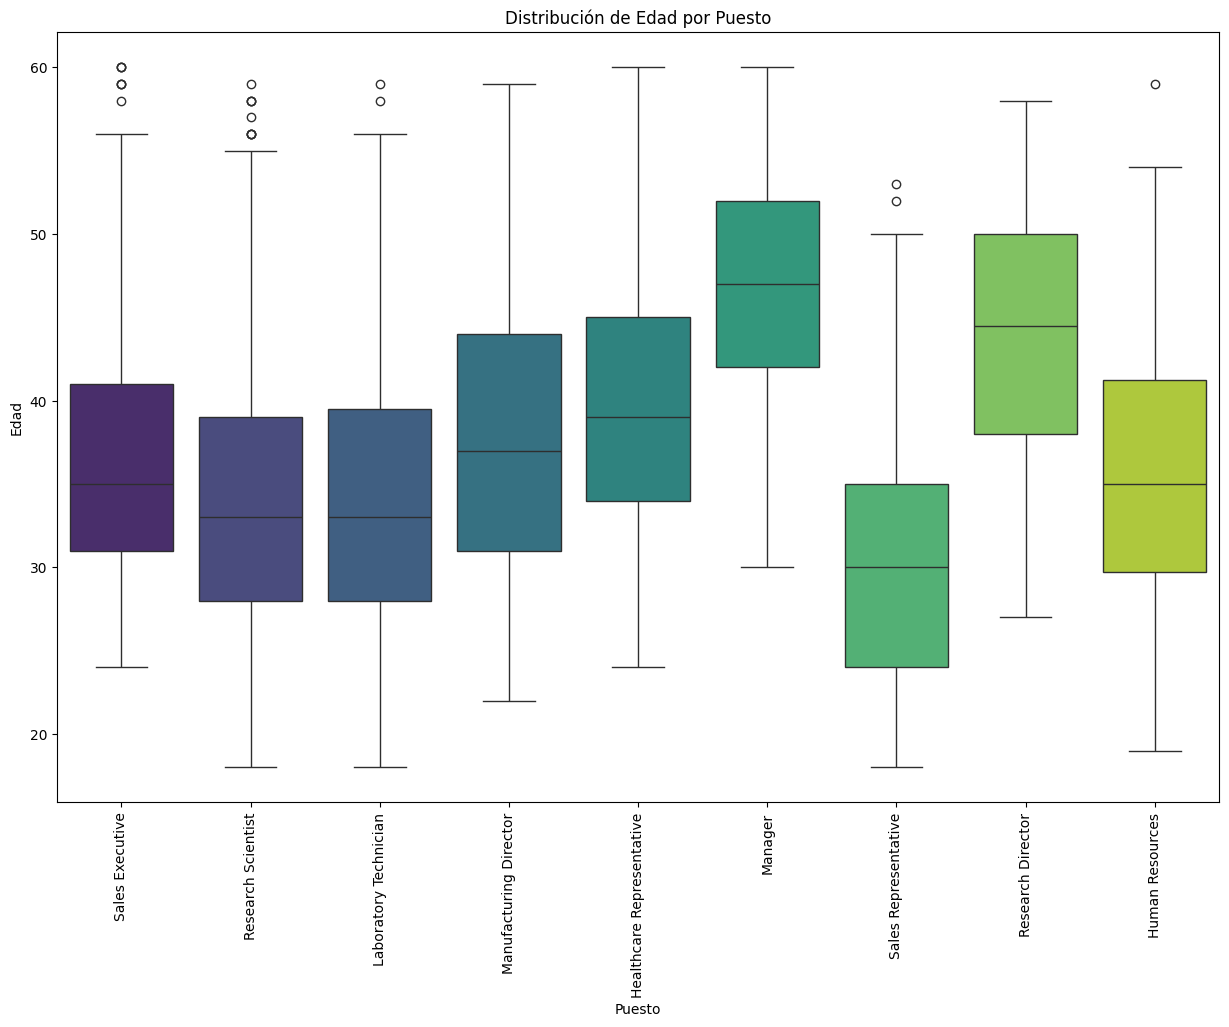

                           count       mean       std   min    25%   50%  \
puesto                                                                     
Healthcare Representative  131.0  39.809160  8.200483  24.0  34.00  39.0   
Human Resources             52.0  35.500000  7.937254  19.0  29.75  35.0   
Laboratory Technician      259.0  34.096525  8.419382  18.0  28.00  33.0   
Manager                    102.0  46.764706  6.941305  30.0  42.00  47.0   
Manufacturing Director     145.0  38.296552  8.622584  22.0  31.00  37.0   
Research Director           80.0  44.000000  7.923687  27.0  38.00  44.5   
Research Scientist         292.0  34.236301  8.592472  18.0  28.00  33.0   
Sales Executive            326.0  36.889571  8.092546  24.0  31.00  35.0   
Sales Representative        83.0  30.361446  8.513373  18.0  24.00  30.0   

                             75%   max  
puesto                                  
Healthcare Representative  45.00  60.0  
Human Resources            41.25  59.0  

In [79]:
def analizar_edad_por_puesto(df):
    """
    Analiza la relación entre los puestos y la edad de los empleados.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    """
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='puesto', y='edad', data=df, palette='viridis')
    plt.title('Distribución de Edad por Puesto')
    plt.xlabel('Puesto')
    plt.ylabel('Edad')
    plt.xticks(rotation=90)
    plt.show()

    # Mostrar estadísticas descriptivas de edad por puesto
    stats_por_puesto = df.groupby('puesto')['edad'].describe()
    print(stats_por_puesto)

# Uso de la función
# df es el DataFrame que contiene tus datos, asegúrate de tener las columnas 'edad' y 'puesto'
analizar_edad_por_puesto(df)

#### Análisis de Carrera por Puesto

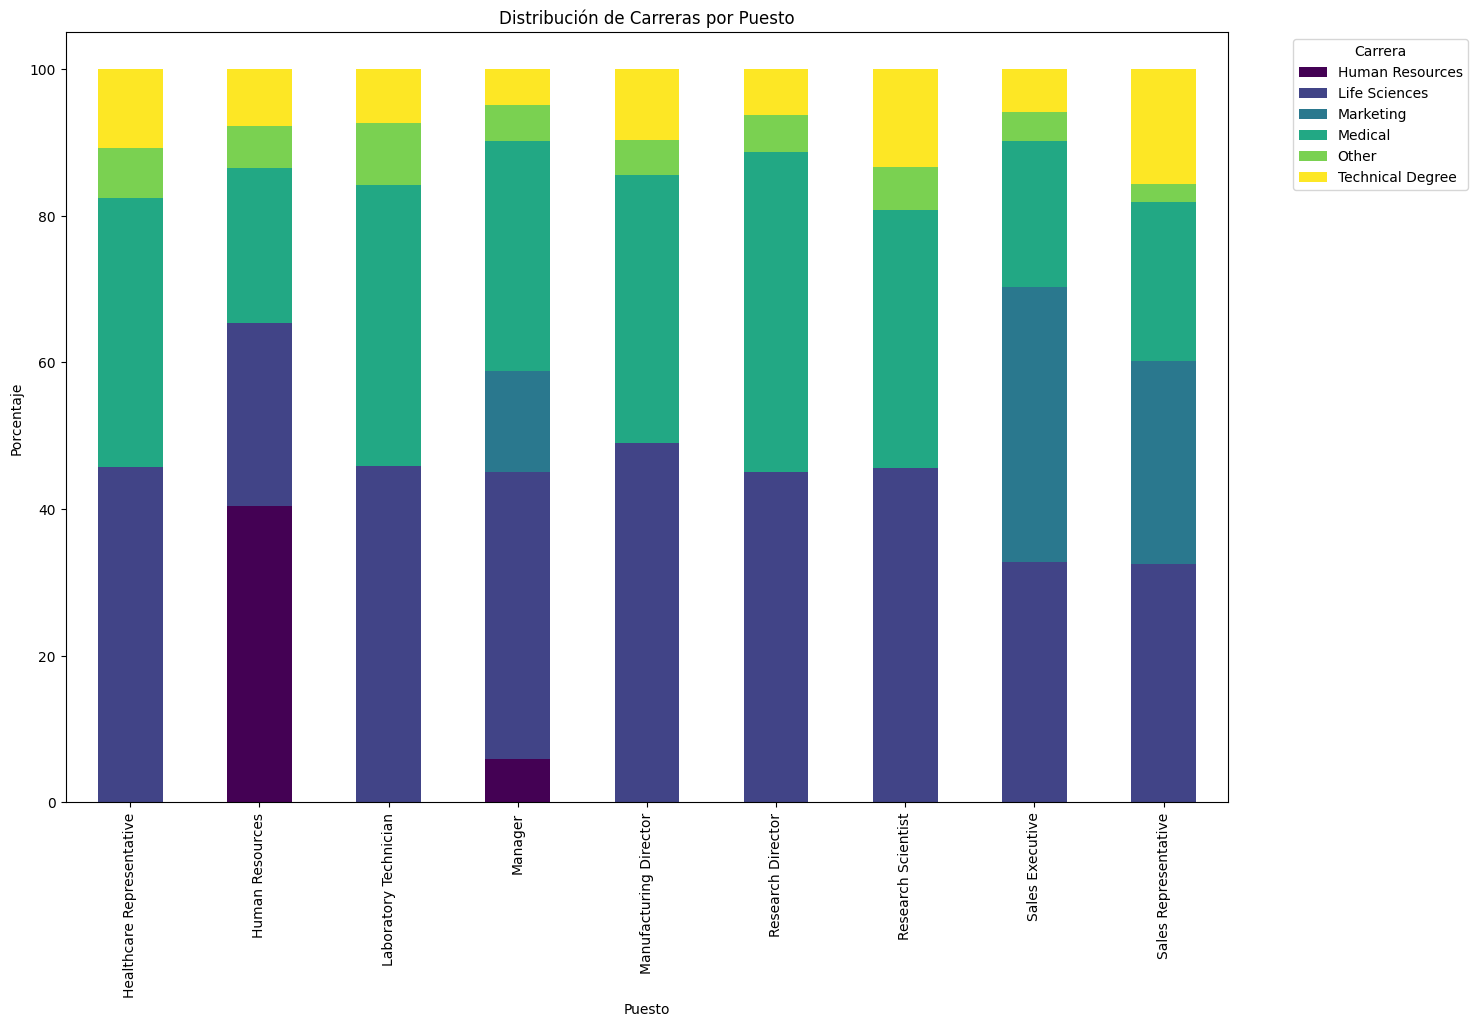

carrera                    Human Resources  Life Sciences  Marketing  \
puesto                                                                 
Healthcare Representative         0.000000      45.801527   0.000000   
Human Resources                  40.384615      25.000000   0.000000   
Laboratory Technician             0.000000      45.945946   0.000000   
Manager                           5.882353      39.215686  13.725490   
Manufacturing Director            0.000000      48.965517   0.000000   
Research Director                 0.000000      45.000000   0.000000   
Research Scientist                0.000000      45.547945   0.000000   
Sales Executive                   0.000000      32.822086  37.423313   
Sales Representative              0.000000      32.530120  27.710843   

carrera                      Medical     Other  Technical Degree  
puesto                                                            
Healthcare Representative  36.641221  6.870229         10.687023  
Human 

In [80]:
def analizar_carrera_por_puesto(df):
    """
    Analiza la relación entre los puestos y las carreras de los empleados.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    """
    # Crear una tabla cruzada
    crosstab = pd.crosstab(df['puesto'], df['carrera'], normalize='index') * 100

    # Visualizar la tabla cruzada con un gráfico de barras apiladas
    crosstab.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
    plt.title('Distribución de Carreras por Puesto')
    plt.xlabel('Puesto')
    plt.ylabel('Porcentaje')
    plt.legend(title='Carrera', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.show()

    # Mostrar estadísticas descriptivas de carrera por puesto
    stats_por_puesto = df.groupby('puesto')['carrera'].value_counts(normalize=True).unstack().fillna(0) * 100
    print(stats_por_puesto)

# Uso de la función
# df es el DataFrame que contiene tus datos, asegúrate de tener las columnas 'carrera' y 'puesto'
analizar_carrera_por_puesto(df)

#### Análisis de Nivel de Estudios por Puesto

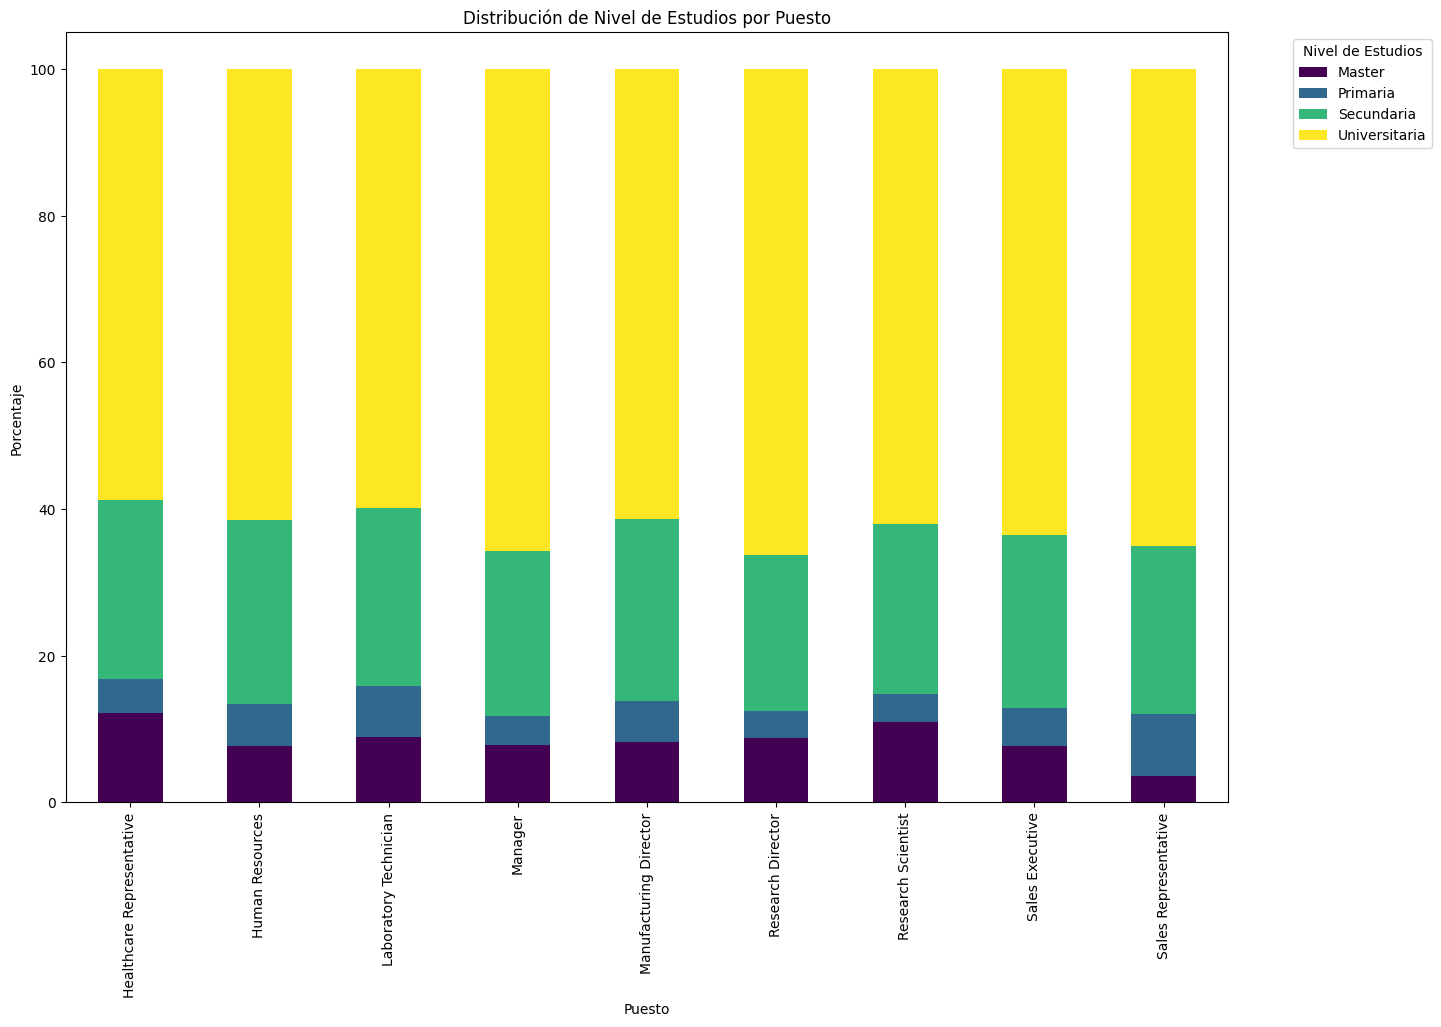

educacion                     Master  Primaria  Secundaria  Universitaria
puesto                                                                   
Healthcare Representative  12.213740  4.580153   24.427481      58.778626
Human Resources             7.692308  5.769231   25.000000      61.538462
Laboratory Technician       8.880309  6.949807   24.324324      59.845560
Manager                     7.843137  3.921569   22.549020      65.686275
Manufacturing Director      8.275862  5.517241   24.827586      61.379310
Research Director           8.750000  3.750000   21.250000      66.250000
Research Scientist         10.958904  3.767123   23.287671      61.986301
Sales Executive             7.668712  5.214724   23.619632      63.496933
Sales Representative        3.614458  8.433735   22.891566      65.060241


In [81]:
def analizar_nivel_estudios_por_puesto(df):
    """
    Analiza la relación entre los puestos y los niveles de estudios de los empleados.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    """
    # Crear una tabla cruzada
    crosstab = pd.crosstab(df['puesto'], df['educacion'], normalize='index') * 100

    # Visualizar la tabla cruzada con un gráfico de barras apiladas
    crosstab.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
    plt.title('Distribución de Nivel de Estudios por Puesto')
    plt.xlabel('Puesto')
    plt.ylabel('Porcentaje')
    plt.legend(title='Nivel de Estudios', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.show()

    # Mostrar estadísticas descriptivas de nivel de estudios por puesto
    stats_por_puesto = df.groupby('puesto')['educacion'].value_counts(normalize=True).unstack().fillna(0) * 100
    print(stats_por_puesto)

# Uso de la función
# df es el DataFrame que contiene tus datos, asegúrate de tener las columnas 'educacion' y 'puesto'
analizar_nivel_estudios_por_puesto(df)

#### Análisis de Satisfacción del Trabajo por Puesto

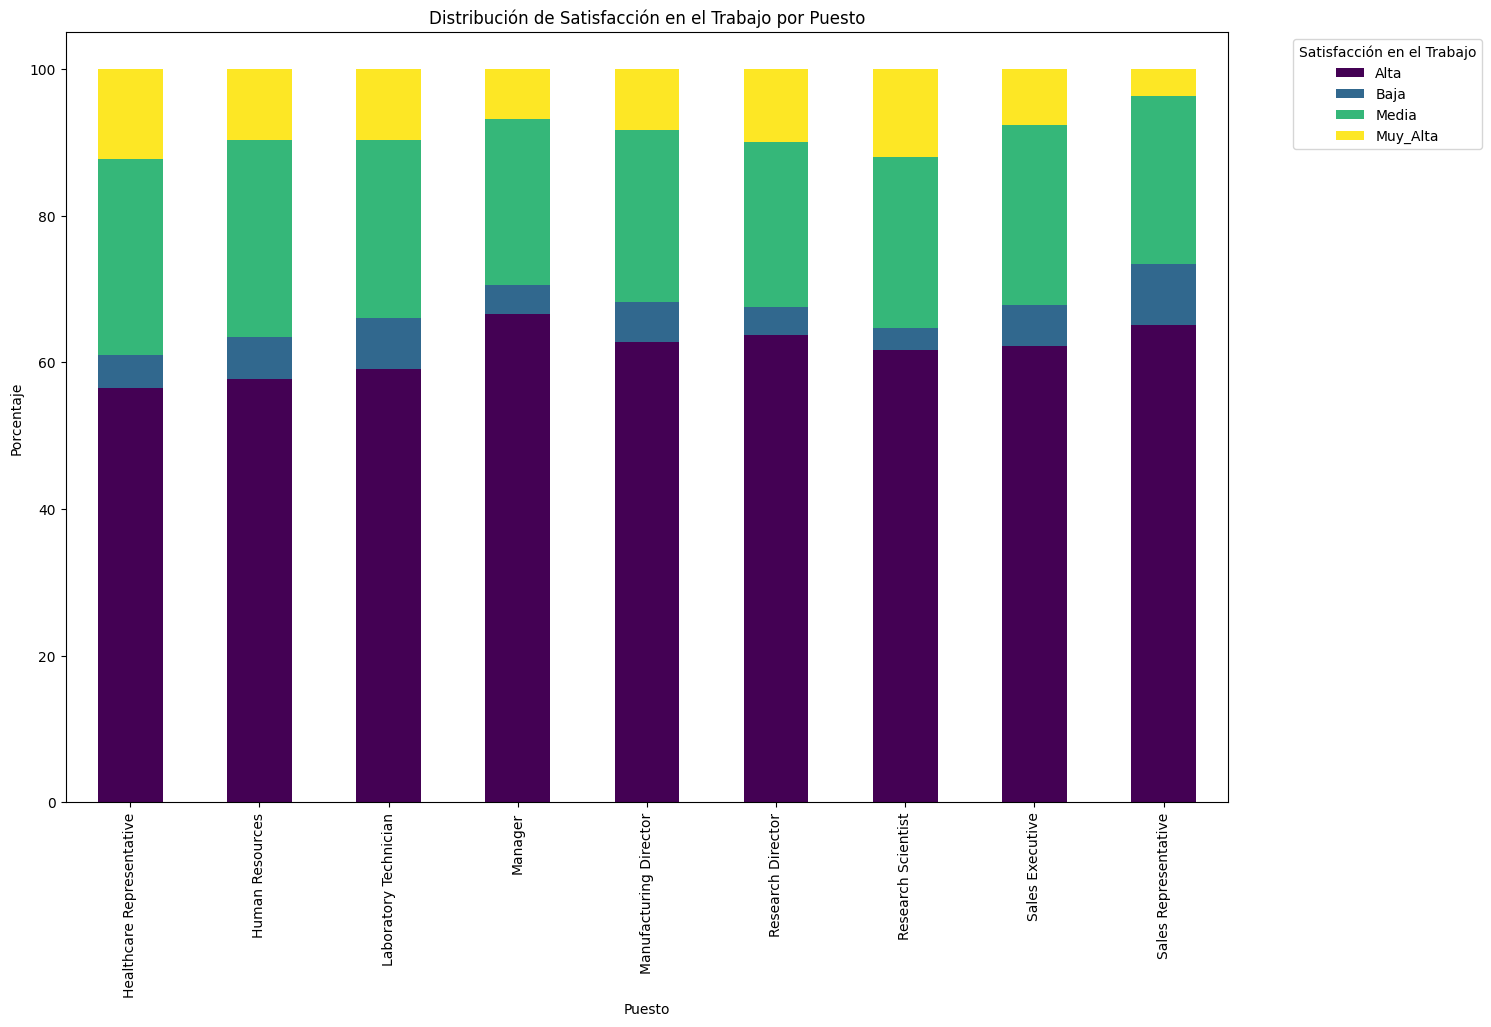

satisfaccion_trabajo            Alta      Baja      Media   Muy_Alta
puesto                                                              
Healthcare Representative  56.488550  4.580153  26.717557  12.213740
Human Resources            57.692308  5.769231  26.923077   9.615385
Laboratory Technician      59.073359  6.949807  24.324324   9.652510
Manager                    66.666667  3.921569  22.549020   6.862745
Manufacturing Director     62.758621  5.517241  23.448276   8.275862
Research Director          63.750000  3.750000  22.500000  10.000000
Research Scientist         61.643836  3.082192  23.287671  11.986301
Sales Executive            62.269939  5.521472  24.539877   7.668712
Sales Representative       65.060241  8.433735  22.891566   3.614458


In [83]:
def analizar_satisfaccion_trabajo_por_puesto(df):
    """
    Analiza la relación entre los puestos y la satisfacción en el trabajo de los empleados.

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas que contiene las variables a analizar.
    """
    # Crear una tabla cruzada
    crosstab = pd.crosstab(df['puesto'], df['satisfaccion_trabajo'], normalize='index') * 100

    # Visualizar la tabla cruzada con un gráfico de barras apiladas
    crosstab.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
    plt.title('Distribución de Satisfacción en el Trabajo por Puesto')
    plt.xlabel('Puesto')
    plt.ylabel('Porcentaje')
    plt.legend(title='Satisfacción en el Trabajo', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.show()

    # Mostrar estadísticas descriptivas de satisfacción en el trabajo por puesto
    stats_por_puesto = df.groupby('puesto')['satisfaccion_trabajo'].value_counts(normalize=True).unstack().fillna(0) * 100
    print(stats_por_puesto)

# Uso de la función
# df es el DataFrame que contiene tus datos, asegúrate de tener las columnas 'satisfaccion_trabajo' y 'puesto'
analizar_satisfaccion_trabajo_por_puesto(df)

#### Conclusiones

Resumen General

Perfiles de Alto Abandono:

Educación: Empleados con niveles educativos más bajos --> **Primaria**

Edad: Empleados más jóvenes, posiblemente buscando avances rápidos --> **Rango de edad, de los 18 a los 26 años**

Salario: Empleados en los rangos de salario más bajos                        
**(990.01, 2908.0]**

Satisfacción: Empleados con baja satisfacción en el trabajo y con los compañeros --> Baja

Puestos Específicos: **Sales Representative** seguido de **Human Resources**

#### IMPACTO ECONÓMICO de este problema

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [85]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [102]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,anos_desde_ult_promocion,anos_con_manager_actual,grupo_edad,grupo_salario,grupo_salario_mes,grupo_satisfaccion_companeros,grupo_satisfaccion_trabajo,grupo_implicacion,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,0,5,"(39.0, 43.2]","(4807.0, 6706.0]","(4807.0, 6706.0]",Baja,Alta,Alta,71916,14670.864
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,1,7,"(47.4, 51.6]","(4807.0, 6706.0]","(4807.0, 6706.0]",Muy_Alta,Media,Media,61560,12558.240
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,0,0,"(34.8, 39.0]","(990.01, 2908.0]","(990.01, 2908.0]",Media,Media,Media,25080,4037.880
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,3,0,"(30.6, 34.8]","(2908.0, 4807.0]","(2908.0, 4807.0]",Alta,Alta,Alta,34908,6876.876
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,2,2,"(26.4, 30.6]","(2908.0, 4807.0]","(2908.0, 4807.0]",Muy_Alta,Alta,Alta,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,0,3,"(34.8, 39.0]","(990.01, 2908.0]","(990.01, 2908.0]",Alta,Muy_Alta,Muy_Alta,30852,6077.844
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,1,7,"(34.8, 39.0]","(8605.0, 10504.0]","(8605.0, 10504.0]",Baja,Media,Media,119892,25177.320
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,0,3,"(26.4, 30.6]","(4807.0, 6706.0]","(4807.0, 6706.0]",Media,Muy_Alta,Muy_Alta,73704,15035.616


#### ¿Cuánto nos ha costado este problema en el último año?

In [33]:

# Convertir los valores 'Yes' y 'No' a 1 y 0 respectivamente
df['abandono'] = df['abandono'].replace({'Yes': 1, 'No': 0})

# Crear la columna 'salario_ano'
df['salario_ano'] = df['salario_mes'] * 12

# Lista de condiciones para calcular el impacto económico
condiciones = [
    (df['salario_ano'] <= 30000),
    (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
    (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
    (df['salario_ano'] > 75000)
]

# Lista de resultados basados en los porcentajes del estudio
resultados = [
    df['salario_ano'] * 0.161,
    df['salario_ano'] * 0.197,
    df['salario_ano'] * 0.204,
    df['salario_ano'] * 0.21
]

# Crear la columna 'impacto_abandono'
df['impacto_abandono'] = np.select(condiciones, resultados, default=0)

# Verificar la creación de las columnas
print("Datos con salario anual e impacto de abandono:")
print(df[['salario_mes', 'salario_ano', 'abandono', 'impacto_abandono']])

# Filtrar los empleados que han abandonado
df_abandono = df[df['abandono'] == 1]

# Verificar los empleados que han abandonado
print("Empleados que han abandonado:")
print(df_abandono[['salario_ano', 'impacto_abandono']])

# Calcular el coste total del abandono
coste_total = df_abandono['impacto_abandono'].sum()
print(f"Coste total del abandono de empleados: ${coste_total:,.2f}")




Datos con salario anual e impacto de abandono:
      salario_mes  salario_ano  abandono  impacto_abandono
id                                                        
1            5993        71916         1         14670.864
2            5130        61560         0         12558.240
4            2090        25080         1          4037.880
5            2909        34908         0          6876.876
7            3468        41616         0          8198.352
...           ...          ...       ...               ...
2061         2571        30852         0          6077.844
2062         9991       119892         0         25177.320
2064         6142        73704         0         15035.616
2065         5390        64680         0         13194.720
2068         4404        52848         0         10780.992

[1470 rows x 4 columns]
Empleados que han abandonado:
      salario_ano  impacto_abandono
id                                 
1           71916         14670.864
4           25080      

#### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [34]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

#### ¿Cuánto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [35]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# MODELO DE MACHINE LEARNING

In [40]:
df_ml = df.copy()

In [42]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   edad                      1470 non-null   int64   
 1   abandono                  1470 non-null   int64   
 2   viajes                    1470 non-null   object  
 3   departamento              1470 non-null   object  
 4   distancia_casa            1470 non-null   int64   
 5   educacion                 1470 non-null   object  
 6   carrera                   1470 non-null   object  
 7   satisfaccion_entorno      1470 non-null   object  
 8   implicacion               1470 non-null   object  
 9   nivel_laboral             1470 non-null   int64   
 10  puesto                    1470 non-null   object  
 11  satisfaccion_trabajo      1470 non-null   object  
 12  estado_civil              1470 non-null   object  
 13  salario_mes               1470 non-null   int64   
 1

## PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

### Transformar todas las variables categóricas a numéricas

In [43]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Datraframe Final

In [45]:
num = df.select_dtypes('number').reset_index(drop = True)

In [46]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


## DISEÑO DE LA MODELIZACIÓN

### Separación predictoras y target

In [47]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

### Separación train y test

In [49]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

## ENTRENAMIENTO DEL MODELO SOBRE TRAIN

In [50]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

## PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [56]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:50]

array([0.87878788, 0.05769231, 0.28378378, 0.28378378, 0.05769231,
       0.05769231, 0.05769231, 0.12857143, 0.05769231, 0.05769231,
       0.08527132, 0.08527132, 0.05769231, 0.05769231, 0.08527132,
       0.05769231, 0.05769231, 0.87878788, 0.08527132, 0.87878788,
       0.05769231, 0.05769231, 0.08527132, 0.05769231, 0.05769231,
       0.12857143, 0.05769231, 0.05769231, 0.65      , 0.12857143,
       0.05769231, 0.05769231, 0.33333333, 0.05769231, 0.12857143,
       0.05769231, 0.05769231, 0.05769231, 0.12857143, 0.08527132,
       0.05769231, 0.66666667, 0.08527132, 0.12857143, 0.12857143,
       0.05769231, 0.65      , 0.12857143, 0.87878788, 0.05769231])

In [58]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.6811313131313133

## INTERPRETACIÓN

### Diagrama del árbol

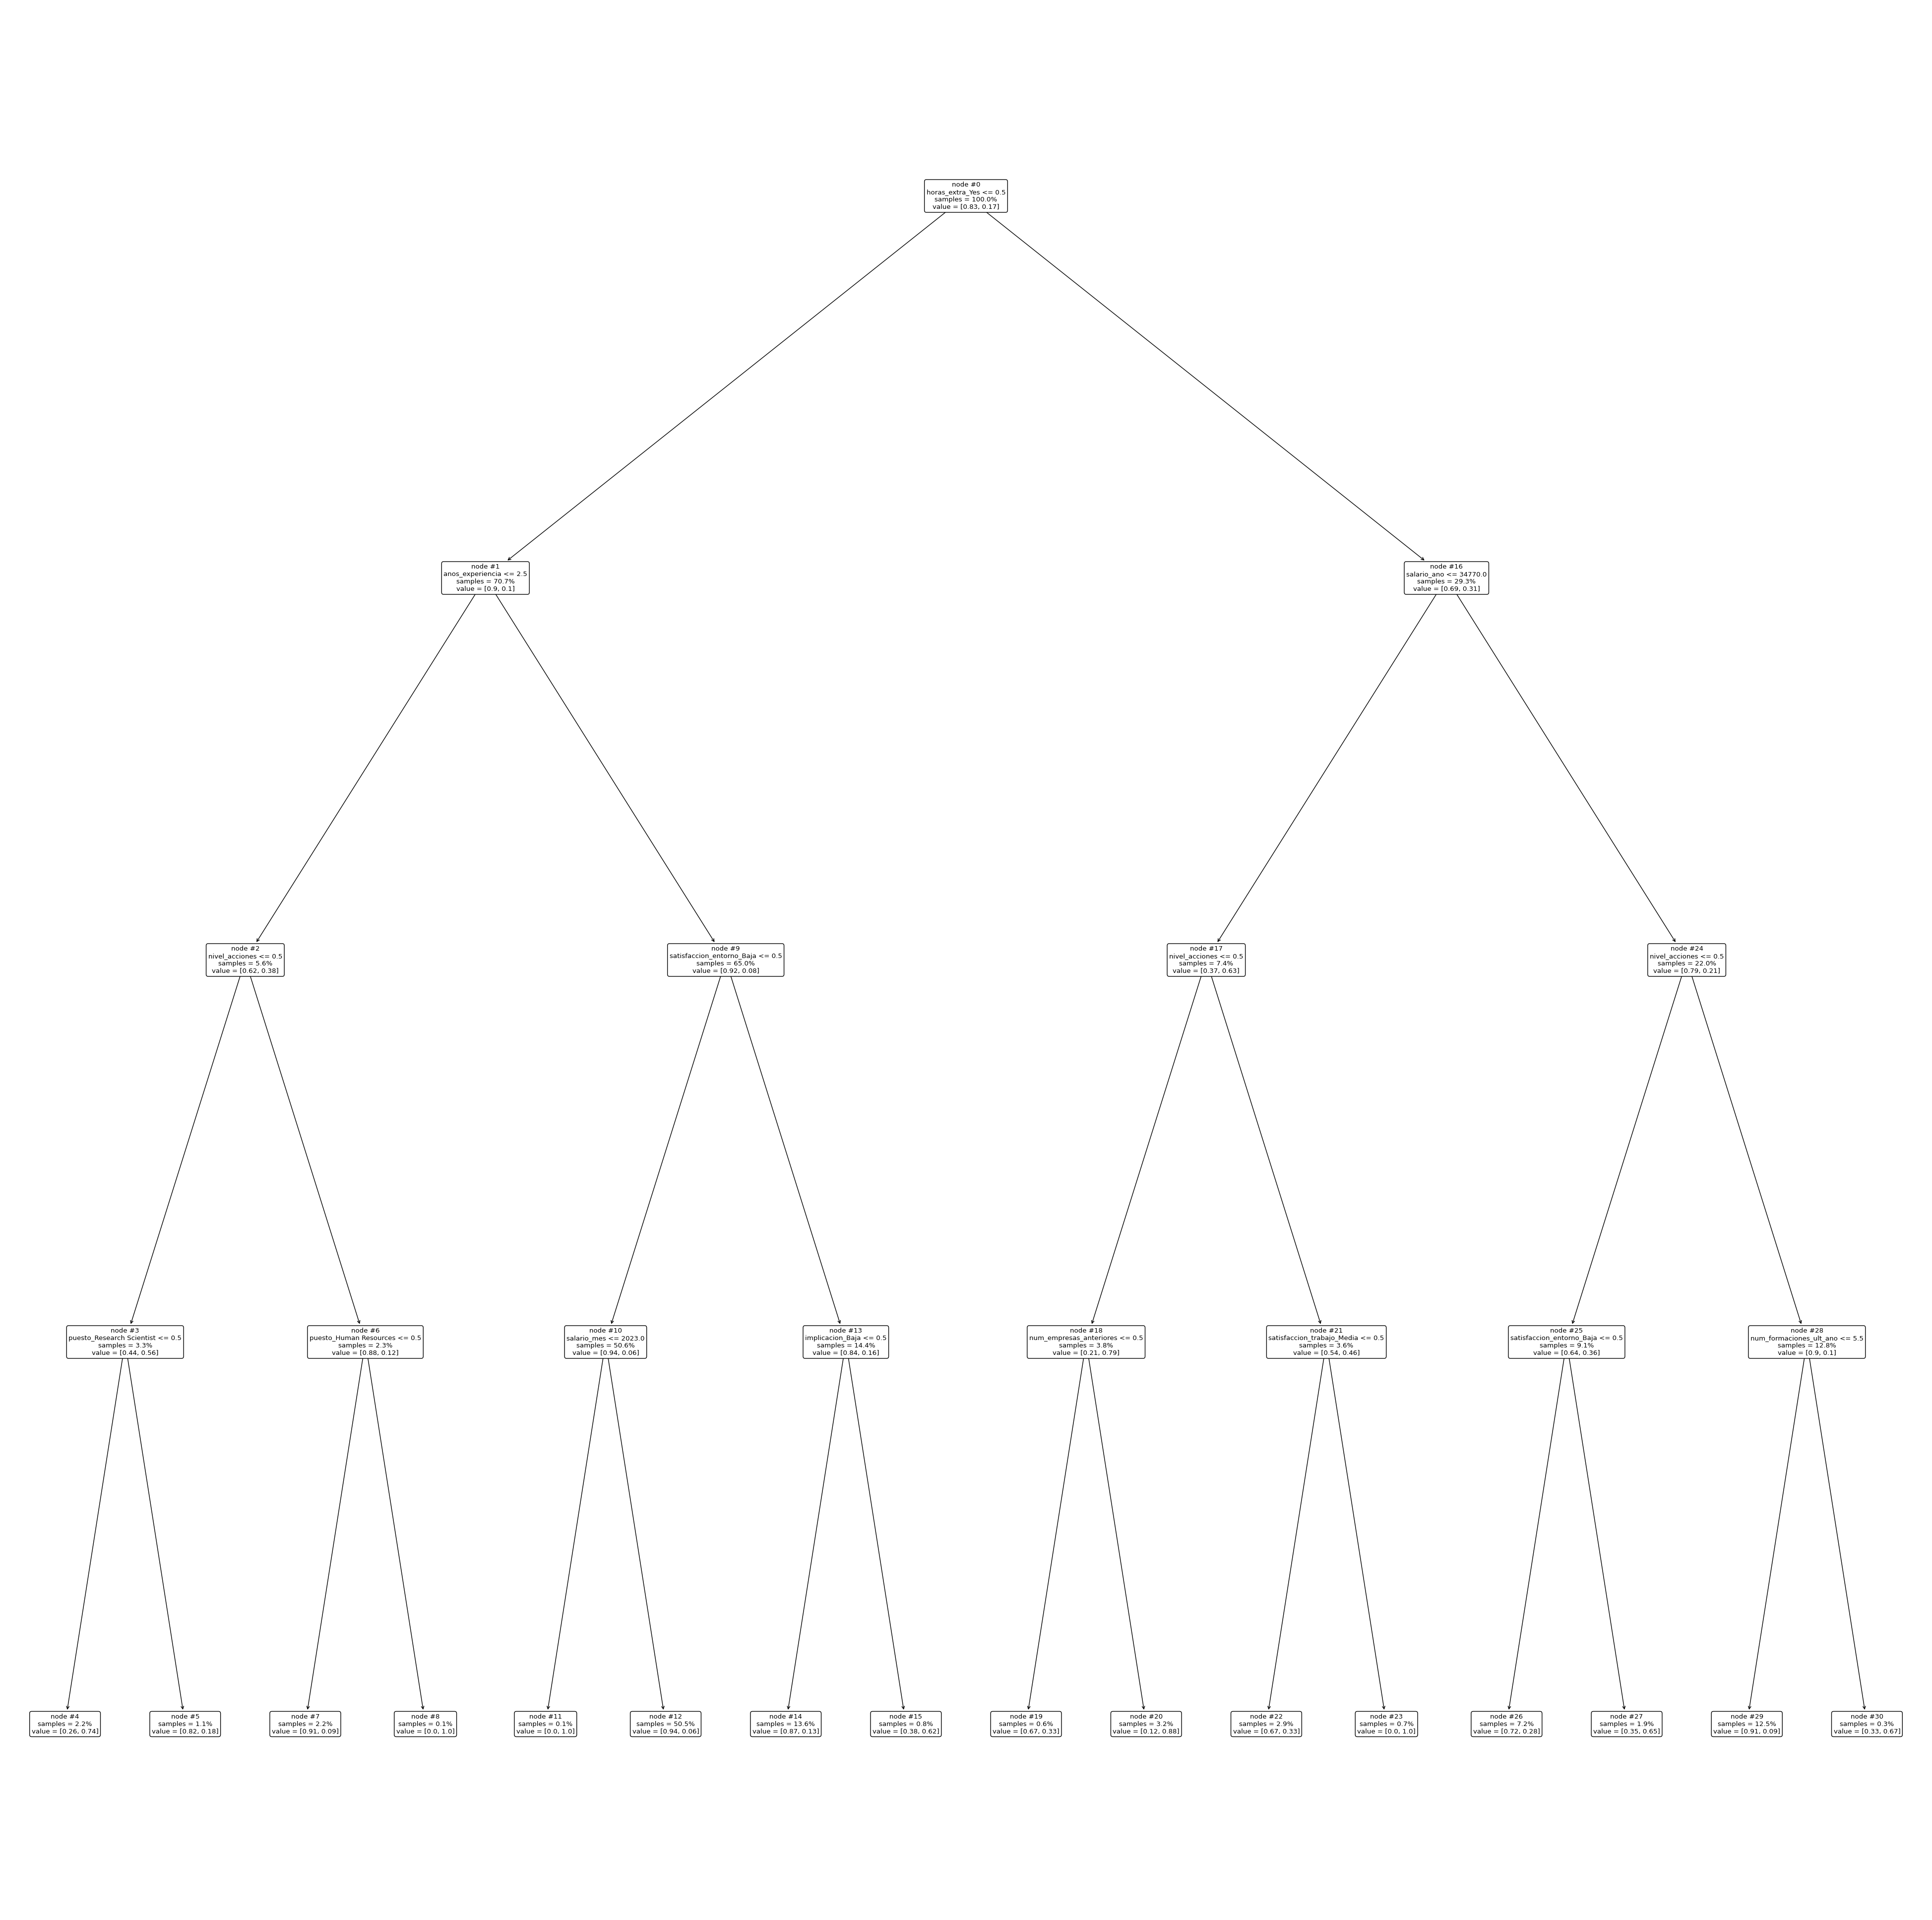

In [59]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

### Importancia de las variables

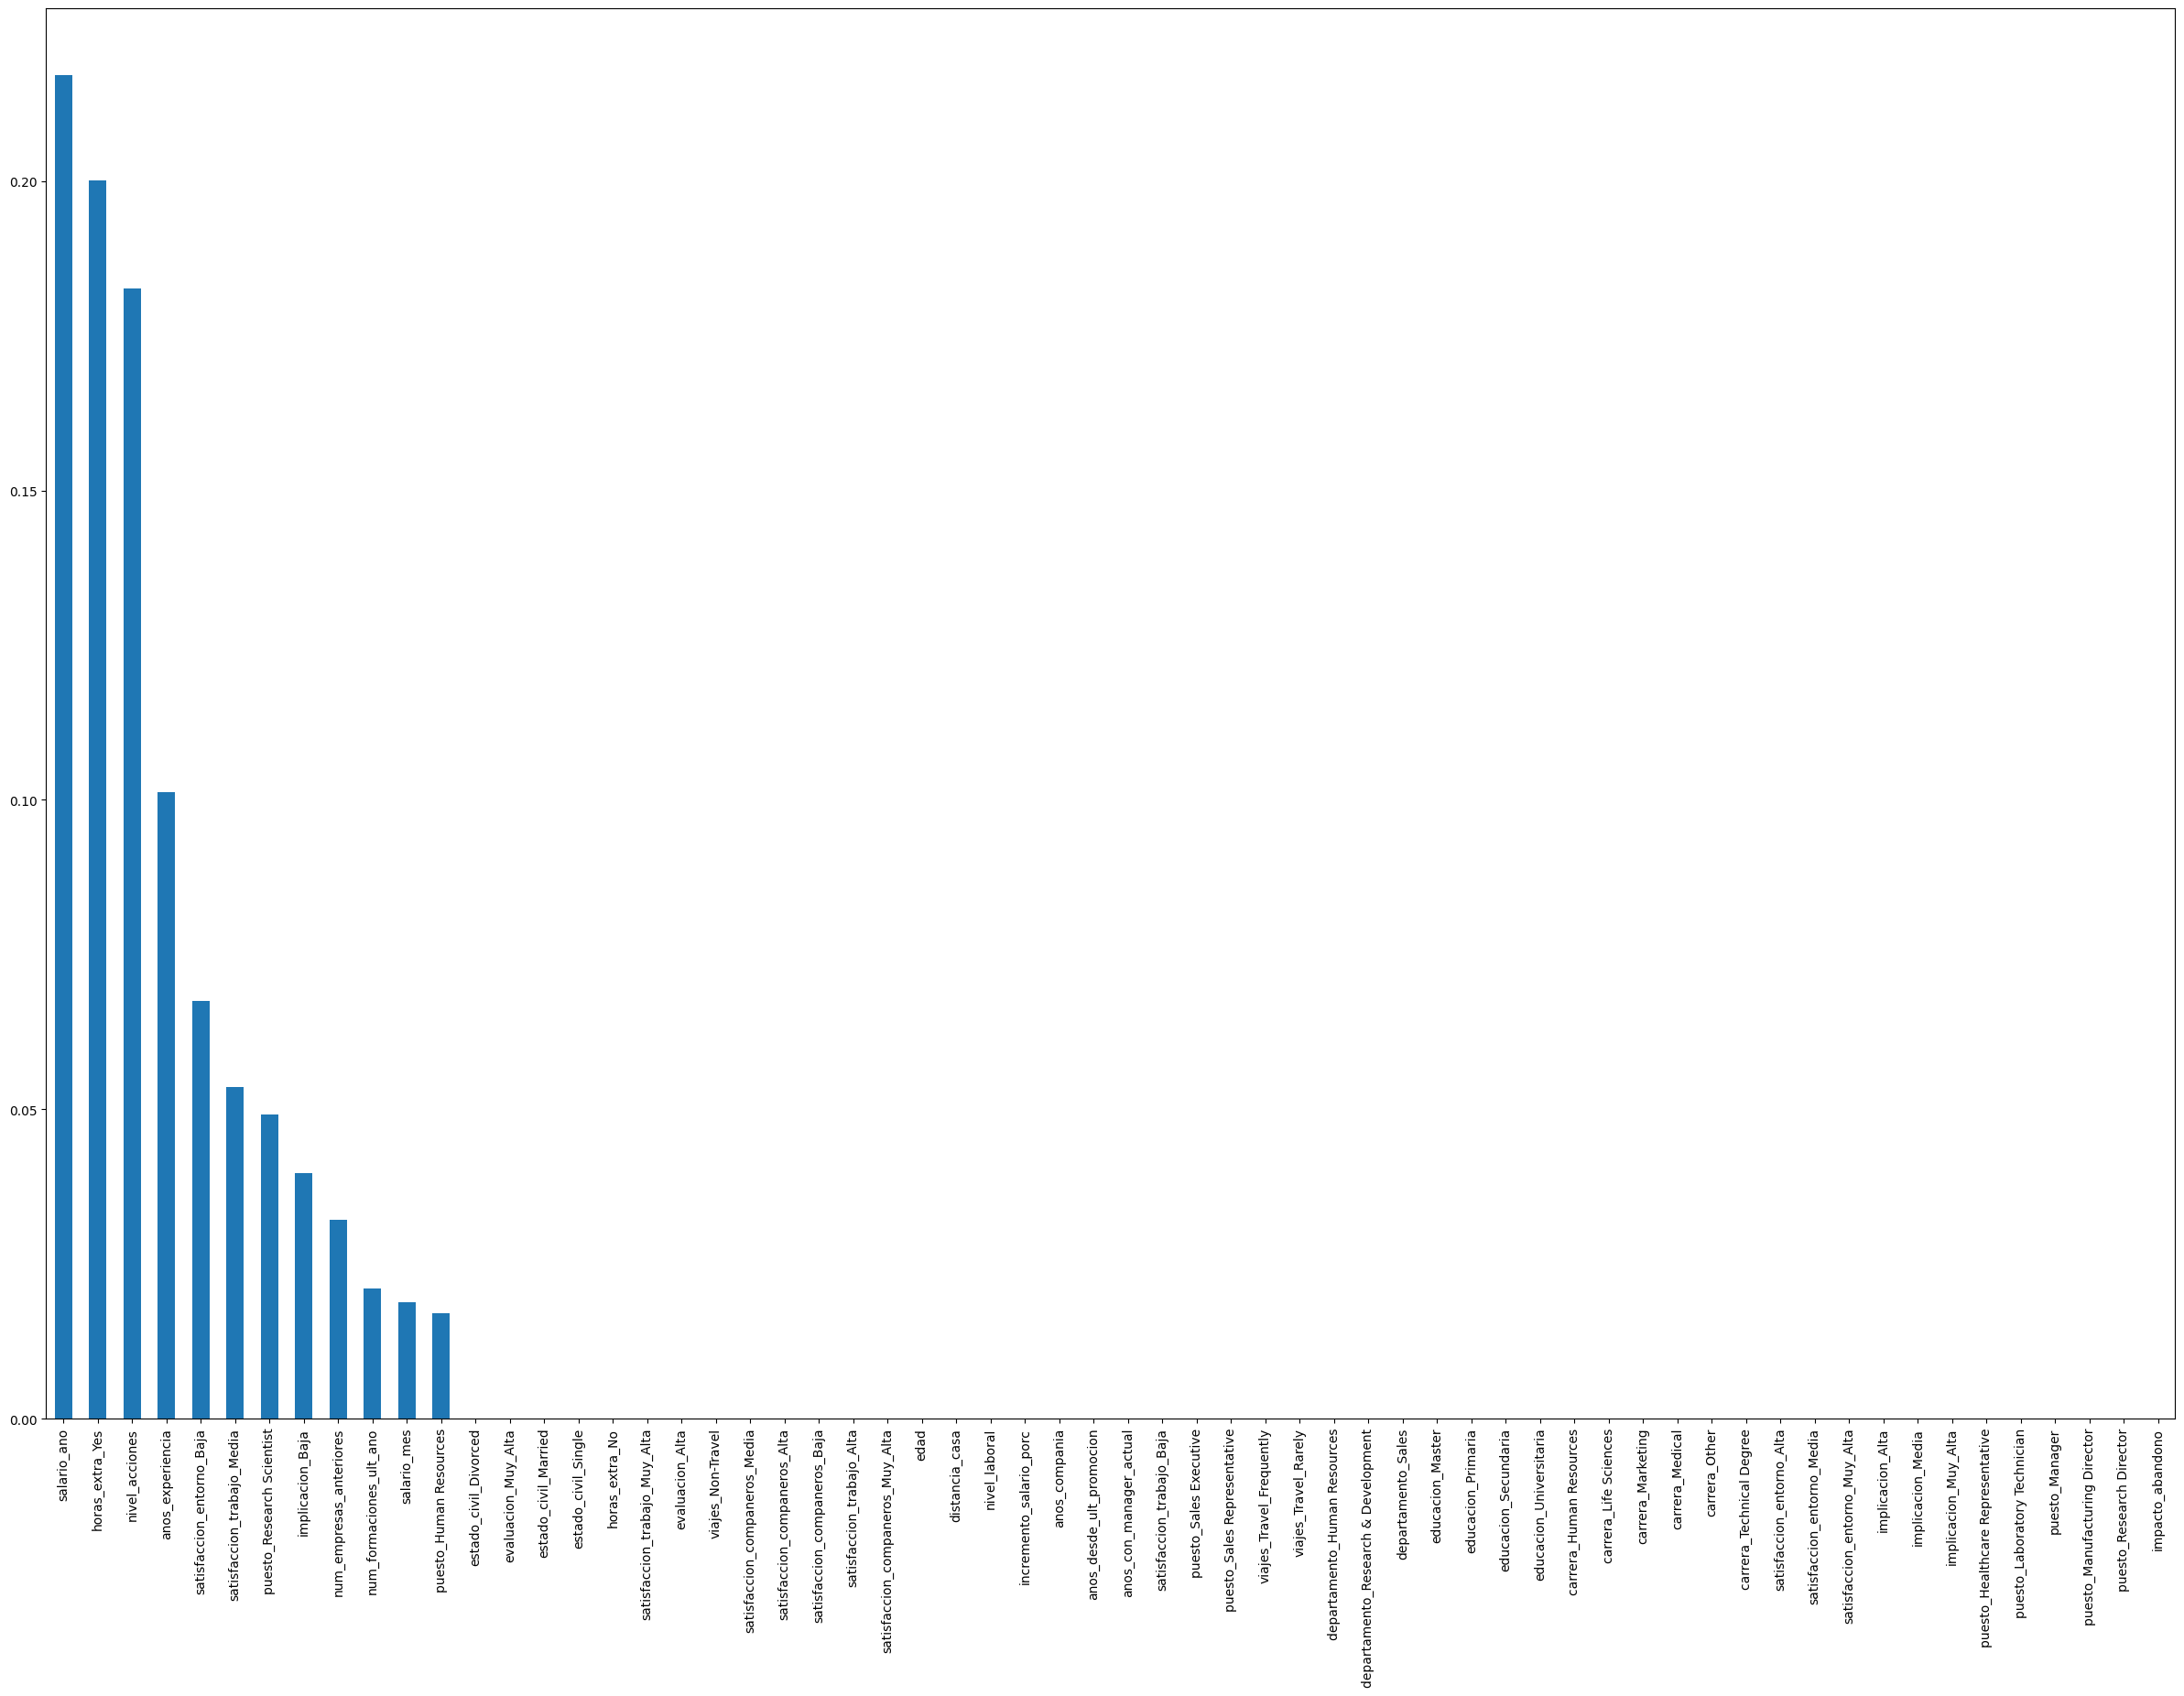

In [60]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

## EXPLOTACIÓN

In [61]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,grupo_salario,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,0,8,0,6,0,5,"(4807.0, 6706.0]",71916,14670.864,0.283784
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,1,10,3,10,1,7,"(4807.0, 6706.0]",61560,12558.240,0.057692
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,0,7,3,0,0,0,"(990.01, 2908.0]",25080,4037.880,0.878788
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,0,8,3,8,3,0,"(2908.0, 4807.0]",34908,6876.876,0.283784
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,1,6,3,2,2,2,"(2908.0, 4807.0]",41616,8198.352,0.128571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,1,17,3,5,0,3,"(990.01, 2908.0]",30852,6077.844,0.057692
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,1,9,5,7,1,7,"(8605.0, 10504.0]",119892,25177.320,0.057692
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,1,6,0,6,0,3,"(4807.0, 6706.0]",73704,15035.616,0.085271


Ejemplo de los 10 empleados con mayor probabilidad de abandonar la empresa

In [62]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,grupo_salario,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1534,40,1,Travel_Rarely,Research & Development,9,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,0,15,3,5,1,0,"(990.01, 2908.0]",24216,3898.776,1.0
224,27,0,Non-Travel,Research & Development,3,Secundaria,Medical,Alta,Media,1,...,1,1,2,1,0,1,"(990.01, 2908.0]",30792,6066.024,1.0
1203,22,1,Travel_Frequently,Research & Development,3,Secundaria,Life Sciences,Alta,Media,1,...,1,1,5,0,0,0,"(990.01, 2908.0]",34236,6744.492,1.0
918,58,1,Travel_Frequently,Research & Development,2,Secundaria,Life Sciences,Muy_Alta,Media,1,...,1,3,3,1,0,0,"(990.01, 2908.0]",28560,4598.160,1.0
952,25,1,Travel_Rarely,Sales,19,Secundaria,Marketing,Alta,Media,1,...,3,1,2,1,0,0,"(990.01, 2908.0]",28956,4661.916,1.0
351,42,0,Travel_Rarely,Research & Development,2,Secundaria,Medical,Muy_Alta,Media,1,...,1,10,4,9,7,8,"(990.01, 2908.0]",31116,6129.852,1.0
1714,24,1,Travel_Rarely,Human Resources,22,Primaria,Human Resources,Muy_Alta,Baja,1,...,1,1,2,1,0,0,"(990.01, 2908.0]",18660,3004.260,1.0
816,29,1,Travel_Rarely,Research & Development,1,Secundaria,Life Sciences,Media,Media,1,...,1,1,1,1,0,0,"(990.01, 2908.0]",27828,4480.308,1.0
1767,43,1,Travel_Frequently,Research & Development,17,Universitaria,Technical Degree,Alta,Media,1,...,1,6,4,1,0,0,"(990.01, 2908.0]",29244,4708.284,1.0


Ejemplo: riesgo de dejar la empresa por puesto de trabajo

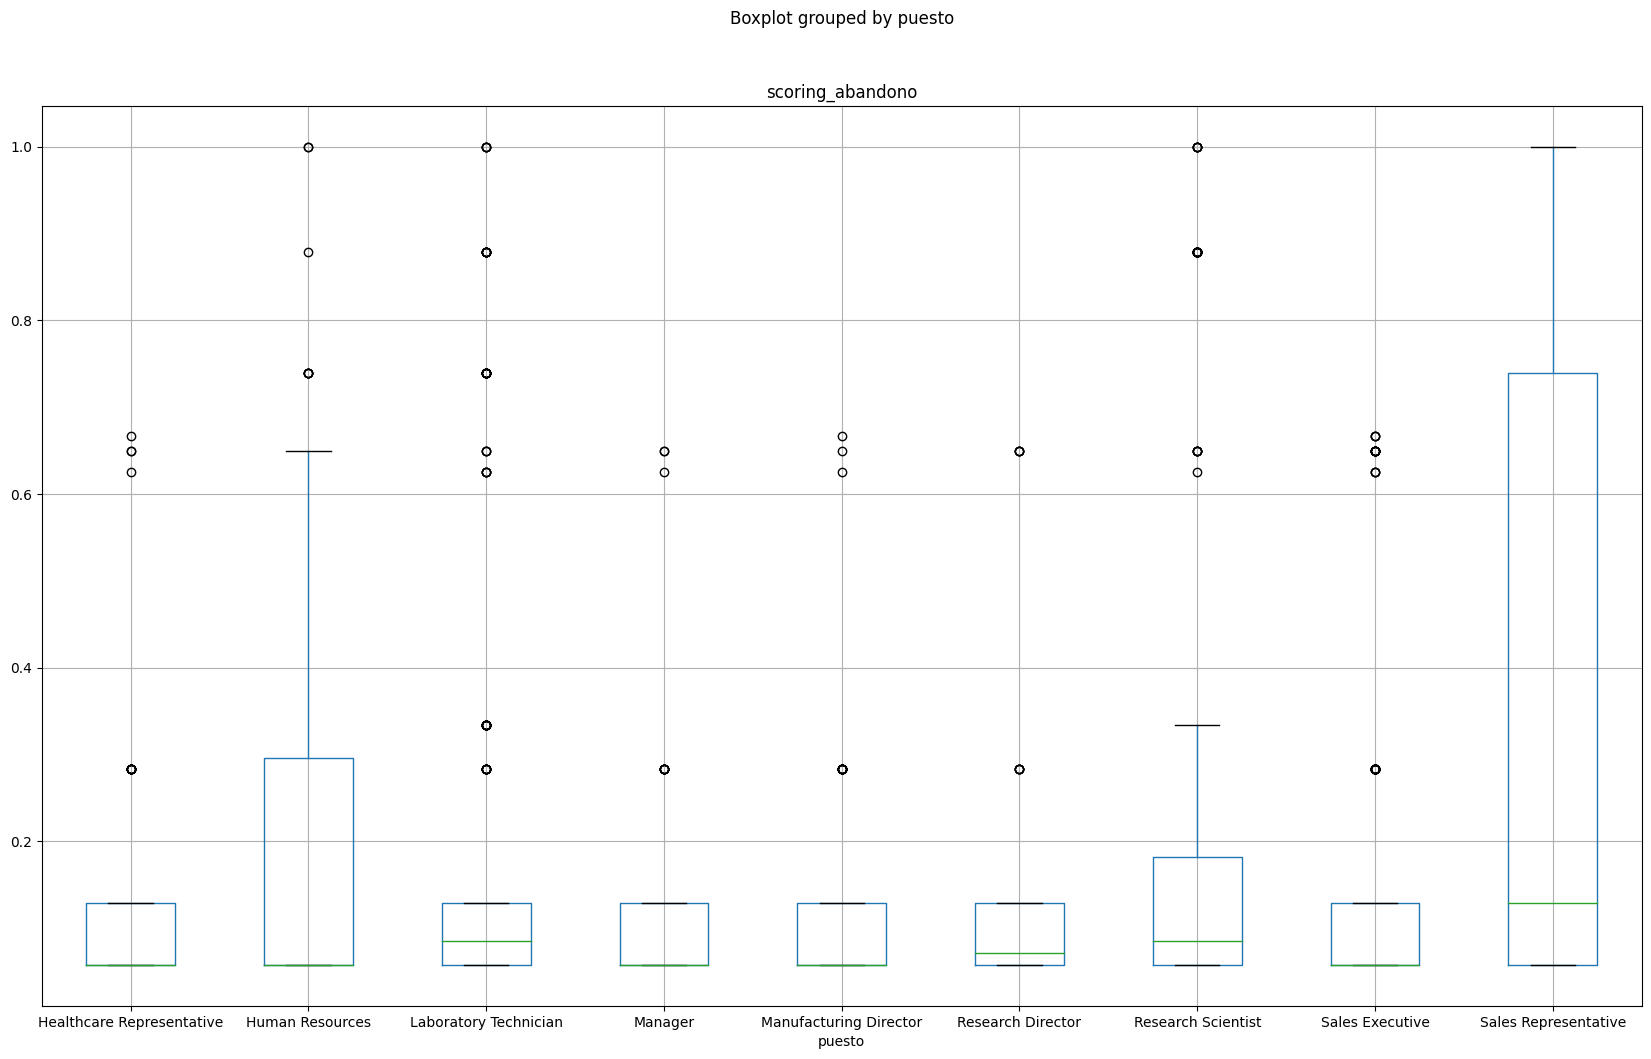

In [63]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

## GUARDAR EL RESULTADO

In [64]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,grupo_salario,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,0,8,0,6,0,5,"(4807.0, 6706.0]",71916,14670.864,0.283784
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,1,10,3,10,1,7,"(4807.0, 6706.0]",61560,12558.240,0.057692
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,0,7,3,0,0,0,"(990.01, 2908.0]",25080,4037.880,0.878788
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,0,8,3,8,3,0,"(2908.0, 4807.0]",34908,6876.876,0.283784
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,1,6,3,2,2,2,"(2908.0, 4807.0]",41616,8198.352,0.128571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,1,17,3,5,0,3,"(990.01, 2908.0]",30852,6077.844,0.057692
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,1,9,5,7,1,7,"(8605.0, 10504.0]",119892,25177.320,0.057692
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,1,6,0,6,0,3,"(4807.0, 6706.0]",73704,15035.616,0.085271


In [65]:
from google.colab import files

df.to_excel('abandono_con_scoring.xlsx')
files.download('abandono_con_scoring.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>